In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
import random as rn
import numpy as np
allMan = [1,2,3,4,5,6,7,8,9]*4
allMan = sorted(allMan)
rn.shuffle(allMan)
#print(allMan)

allPin = [21,22,23,24,25,26,27,28,29]*4
allPin = sorted(allPin)
rn.shuffle(allPin)
#print(allPin)

allSou = [41,42,43,44,45,46,47,48,49]*4
allSou = sorted(allSou)
rn.shuffle(allSou)
#print(allSou)

allHonor = [60,70,80,90,100,110,120]*4
allHonor = sorted(allHonor)
rn.shuffle(allHonor)
#print(allHonor)

allTiles = allMan + allPin + allSou + allHonor
allTiles = sorted(allTiles)
rn.shuffle(allTiles)
#print(allTiles)

#print(len(allTiles))

In [8]:
def rh():
    return sorted(allMan[:14])

hand = rh()
print(len(hand))
print(hand)

def rhFull(allTiles):
    allTiles = sorted(allTiles)
    rn.shuffle(allTiles)
    return sorted(allTiles[:14])

def rhFull13(allTiles):
    allTiles = sorted(allTiles)
    rn.shuffle(allTiles)
    return sorted(allTiles[:13])

rhfHand = rhFull(allTiles)
print(rhfHand)

14
[1, 2, 2, 3, 3, 4, 4, 5, 6, 7, 7, 8, 8, 9]
[4, 4, 5, 6, 9, 21, 22, 28, 29, 45, 49, 60, 70, 120]


There are 5 slots that need to be filled to complete a hand, 4 melds (either something like 333 or like 345) and 1 pair
(something like 77.)

In [9]:
def mp(hand):
    markPairs = []
    if len(hand) != 0:
        for i in set(hand):
            if hand.count(i) > 1:
                markPairs.append(i)
    return markPairs

ot = mp(hand)
#print(ot)

In [10]:
def cc(hand):
    complete = False
    paired = mp(hand)
    if len(paired) == 0:
        return complete
    else:
        for i in range(len(paired)):
            done = 0
            mh = hand[:]
            mh.remove(paired[i])
            mh.remove(paired[i])
            while len(mh) != 0 and done == 0:
                val = mh[0]
                if mh.count(val) >= 3:
                    mh.remove(val)
                    mh.remove(val)
                    mh.remove(val)
                elif val-1 in mh and val-2 in mh:
                    mh.remove(val)
                    mh.remove(val-1)
                    mh.remove(val-2)
                elif val-1 in mh and val+1 in mh:
                    mh.remove(val)
                    mh.remove(val-1)
                    mh.remove(val+1)
                elif val+1 in mh and val+2 in mh:
                    mh.remove(val)
                    mh.remove(val+1)
                    mh.remove(val+2)
                else:
                    done = 1
            if len(mh) == 0:
                complete = True
    return complete
#cc(hand)
cc([1,1,1,2,3,4,4,4,6,6,6,7,8,9])

True

Now we have to define Tenpai, and define it WITHOUT checking
to see if adding to it would result in a complete hand, because if you keep doing that, you end up with too
huge of a bruteforce when you're trying to calculate if it's anywhere from 3 to 5 shanten. (You don't need to calculate if it's 6 shanten because you're always at least 6 shanten because of seven pairs.)

Anyhow yeah, for this one I'm going to actually introduce the hand as four lists, man, pin, sou, and honor.

In [11]:
nineGates = [1,1,1,2,3,4,5,6,7,8,9,9,9,70]

def handToFourList(hand):
    man=[]
    pin=[]
    sou=[]
    honor=[]
    handConvert = []
    for i in hand:
        if i in range(1,10):
            man.append(i)
        elif i in range(21,30):
            pin.append(i)
        elif i in range(41,50):
            sou.append(i)
        elif i in range(60,500):#121):
            honor.append(i)
        else:
            print("invalid hand")
            return
    handConvert.append(man)
    handConvert.append(pin)
    handConvert.append(sou)
    handConvert.append(honor)
    return handConvert

#q = handToFourList(nineGates)
#print(q)

def shantenLookup(lisk):
    #conditions for complete thru 5 away
    # MIGHT BE INCOMPLETE
    complete = [[4,1,0]]
    tenpai = [[4,0,0],[3,1,1],[3,2,0],[4,0,1]]
    away1 = [[3,1,0],[3,0,1],[2,1,2],[2,2,1],[2,3,0],[3,0,2]]
    away2 = [[3,0,0],[2,1,1],[2,2,0],[2,0,2],[2,0,3],[1,1,3],[1,2,2],[1,3,1],[1,4,0]]
    away3 = [[1,0,4],[1,0,5],[2,0,1],[2,1,0],[1,0,3],[1,1,2],[1,2,1],[1,3,0],[0,5,0],[0,4,1],[0,3,2],[0,2,3],[0,1,4]]
    away4 = [[2,0,0],[1,0,2],[1,2,0],[1,1,1],[0,0,5],[0,0,4],[0,3,1],[0,2,2],[0,1,3],[0,4,0]]
    away5 = [[1,0,1],[1,1,0],[0,0,3],[0,2,1],[0,1,2],[0,3,0]]
    #not 002, 011, 020, these are 6
    
    if lisk in complete:
        return -1
    elif lisk in tenpai:
        return 0
    elif lisk in away1:
        return 1
    elif lisk in away2:
        return 2
    elif lisk in away3:
        return 3
    elif lisk in away4:
        return 4
    elif lisk in away5:
        return 5
    else:
        return 6

# lusk = [4,1,0]

# qqq = shantenLookup(lusk)
    
# print(qqq)

def daPairShantenPlz(hand):
    pairs = 0
    for i in set(hand):
        if hand.count(i) > 1:
            pairs += 1
    return (6 - pairs)

def daKokushiShantenPlz(hand):
    daSum = 0
    daKokushis = [1,9,21,29,41,49,60,70,80,90,100,110,120]
    for i in range(len(daKokushis)):
        if hand.count(daKokushis[i]) > 0:
            daSum += 1
    inc = False
    for i in hand:
        if i in daKokushis and hand.count(i) > 1:
            inc = True
    if inc == True:
        daSum += 1
    return (13 - daSum)

def shantenPlz(hand):
    '''This function is bloated, but it is also very fast and works flawlessly near as I can tell,
    so it's fine.'''
    hc = handToFourList(hand)
    bestScore = [0,0,0]
    scores = []
    #print(hc)
    for v in range(len(hc)):
        #print("hci",hc[v])
        if len(hc[v]) <= 1:
            scores.append([[0,0,0]])
        else:
            paired = mp(hc[v])
            #print("the pairs",paired)
            if len(paired) == 0:
                done = 0
                doon = 0
                meldCount = 0
                pairCount = 0
                connCount = 0
                mh = hc[v][:]
                #print("NO pair land")
                spt = 0
                #print("spt",spt)
                #print("len(mh)",len(mh))
                #print("mh",mh)
                #print("mh[0]",mh[0])
                while len(mh) > 2 and spt <= len(mh)-1:
                    #print("spt",spt)
                    #print("len(mh)",len(mh))
                    #print("mh",mh)
                    #print("mh[0]",mh[0])
                    val = mh[spt]
                    if mh.count(val) >= 3:
                        mh.remove(val)
                        mh.remove(val)
                        mh.remove(val)
                        meldCount += 1
                        spt = 0
                    elif val in mh and val-1 in mh and val-2 in mh:
                        mh.remove(val)
                        mh.remove(val-1)
                        mh.remove(val-2)
                        meldCount += 1
                        spt = 0
                    elif val in mh and val-1 in mh and val+1 in mh:
                        mh.remove(val)
                        mh.remove(val-1)
                        mh.remove(val+1)
                        meldCount += 1
                        spt = 0
                    elif val in mh and val+1 in mh and val+2 in mh:
                        mh.remove(val)
                        mh.remove(val+1)
                        mh.remove(val+2)
                        meldCount += 1
                        spt = 0
                    else:
                        spt += 1
                spt = 0
                #print("pairs smaller area")
                #print("spt",spt)
                #print("len(mh)",len(mh))
                #print("mh",mh)
                #print("mh[0]",mh[0])
                while len(mh) > 1 and spt <= len(mh)-1:
                    #print("spt",spt)
                    #print("len(mh)",len(mh))
                    #print("mh",mh)
                    #print("mh[0]",mh[0])
                    val = mh[spt]
                    if mh.count(val) >= 2:
                        mh.remove(val)
                        mh.remove(val)
                        connCount += 1
                        spt = 0
                    elif val in mh and val+1 in mh:
                        mh.remove(val)
                        mh.remove(val+1)
                        connCount += 1
                        spt = 0
                    elif val in mh and val+2 in mh:
                        #print("we're in val+2 mh",mh,val,val+2)
                        mh.remove(val)
                        mh.remove(val+2)
                        connCount += 1
                        spt = 0
                    else:
                        spt += 1
                scores.append([meldCount,pairCount,connCount])
            else:
                subscores = []
                for i in range(len(paired)):
                    #print("before we even do anything",hc[v])
                    done = 0
                    doon = 0
                    #print("pre-assign",hc[v])
                    mh = hc[v][:]
                    #print("post-assign",hc[v])
                    #print("before pair del",mh)
                    mh.remove(paired[i])
                    mh.remove(paired[i])
                    #print("after pair del",hc[v])
                    meldCount = 0
                    pairCount = 1
                    connCount = 0
                    spt = 0
                    #print("yeah it went into pair land")
                    while len(mh) > 2 and spt <= len(mh)-1:
                        #print("spt",spt)
                        #print("len(mh)",len(mh))
                        val = mh[spt]
                        if mh.count(val) >= 3:
                            mh.remove(val)
                            mh.remove(val)
                            mh.remove(val)
                            meldCount += 1
                            spt = 0
                        elif val in mh and val-1 in mh and val-2 in mh:
                            mh.remove(val)
                            mh.remove(val-1)
                            mh.remove(val-2)
                            meldCount += 1
                            spt = 0
                        elif val in mh and val-1 in mh and val+1 in mh:
                            mh.remove(val)
                            mh.remove(val-1)
                            mh.remove(val+1)
                            meldCount += 1
                            spt = 0
                        elif val in mh and val+1 in mh and val+2 in mh:
                            mh.remove(val)
                            mh.remove(val+1)
                            mh.remove(val+2)
                            meldCount += 1
                            spt = 0
                        else:
                            spt += 1
                    spt = 0
                    while len(mh) > 1 and spt <= len(mh)-1:
                        val = mh[spt]
                        if mh.count(val) >= 2:
                            mh.remove(val)
                            mh.remove(val)
                            connCount += 1
                            spt = 0
                        elif val in mh and val+1 in mh:
                            mh.remove(val)
                            mh.remove(val+1)
                            connCount += 1
                            spt = 0
                        elif val in mh and val+2 in mh:
                            #print("we're in val+2 mh [secondArea]",mh,val,val+2)
                            mh.remove(val)
                            mh.remove(val+2)
                            connCount += 1
                            spt = 0
                        else:
                            spt += 1
                    #print("post-elim",hc[v])
                    subscores.append([meldCount,pairCount,connCount])
                scores.append(subscores)
    rankScores = []
    for i in range(len(scores)):
        if len(scores[i]) == 0:
            scores[i] = [[0,0,0]]
        elif type(scores[i][0]) == int:
            scores[i] = [scores[i]]
    for i in scores:
        np.array(i)
    ###print(scores)
    for i in scores[0]:
        for j in scores[1]:
            for k in scores[2]:
                for l in scores[3]:
                    sum = np.array([0,0,0])
                    #print(sum)
                    sum += i
                    #print(sum)
                    sum += j
                    #print(sum)
                    sum += k
                    #print(sum)
                    sum += l
                    #print(sum)
                    #print(sum)
                    if sum[1] > 1:
                        sum[1] = 1
                    #print(sum)
                    rankScores.append(shantenLookup(list(sum)))
    done = 0
    doon = 0
    meldCount = 0
    pairCount = 0
    connCount = 0
    mh = hand[:]
    spt = 0
    #print("final area")
    while len(mh) > 2 and spt <= len(mh)-1:
        val = mh[spt]
        if mh.count(val) >= 3:
            mh.remove(val)
            mh.remove(val)
            mh.remove(val)
            meldCount += 1
            spt = 0
        elif val-1 in mh and val-2 in mh:
            mh.remove(val)
            mh.remove(val-1)
            mh.remove(val-2)
            meldCount += 1
            spt = 0
        elif val in mh and val-1 in mh and val+1 in mh:
            mh.remove(val)
            mh.remove(val-1)
            mh.remove(val+1)
            meldCount += 1
            spt = 0
        elif val in mh and val+1 in mh and val+2 in mh:
            mh.remove(val)
            mh.remove(val+1)
            mh.remove(val+2)
            meldCount += 1
            spt = 0
        else:
            spt += 1
    spt = 0
    
    while len(mh) != 0 and spt <= len(mh)-1:
        val = mh[spt]
        for i in mh:
            if mh.count(i) >= 2:
                mh.remove(i)
                mh.remove(i)
                if pairCount == 0:
                    pairCount += 1
                else:
                    connCount += 1
                spt = 0
        if val in mh and val+1 in mh:
            mh.remove(val)
            mh.remove(val+1)
            connCount += 1
            spt = 0
        elif val in mh and val+2 in mh:
            mh.remove(val)
            mh.remove(val+2)
            connCount += 1
            spt = 0
        else:
            spt += 1
    rankScores.append(shantenLookup([meldCount,pairCount,connCount]))
    rankScores.append(daPairShantenPlz(hand))
    rankScores.append(daKokushiShantenPlz(hand))
    if cc(hand) == True:
        rankScores.append(-1)
    ###print([meldCount,pairCount,connCount])
    ###print(rankScores)
    #Interpreting the results:
    # -1 = complete
    # 0 = tenpai
    # 1 = 1 shanten
    # 2 = 2 shanten
    # etc
    return min(rankScores)

#testHand = 

testHand = rhFull(allTiles)
#print(len(testHand))
#print(testHand)

#print(daPairShantenPlz(testHand))

#print("===")
#print("===")

#print(daKokushiShantenPlz(testHand))

#print(len(testHand))

#shantenPlz(testHand)

#######################################################
#######################################################
#######################################################
#######################################################

#### NEW FUNCTIONS FOR DETERMINISTIC OFFENSE ##########

#uses shantenPlz()

#                goals:

## imagine a hand, we want to figure out:
    # - the shanten
    # - how many literal existant tiles improve the shanten of the hand. (Waits)
            # (this is a differentiator for 2 shanten hands for example. Not all 2 shantens are equal.)
    # - the discard that is most likely to lead to the hand with the best shanten and waits. (2 deep)
    
    # notes on that last thing I just said -- I gotta think about how involved that is.
    ## seems like for one you have to know what tiles are out. this could honestly be condensed in a column
    # as a list of all 34 unique tiles by rank (idk if including red 5s separately or not)
    #### Also, you'd potentially need to go several checks deep. 
    
# def lookingForward(hand,seenTileCounts):
#     ''' takes 2 inputs -- your hand and the tiles you know are out (would already include your hand's tiles)'''
    
#     stc = seenTileCounts[:] #list of counts of tiles you've seen, max is 4, meaning you can't draw the tile.
    
#     allTilesListed = [1,2,3,4,5,6,7,8,9,
#                       21,22,23,24,25,26,27,28,29,
#                       41,42,43,44,45,46,47,48,49,
#                       60,70,80,90,100,110,120]    #List of all tiles, but will be updated with all the tiles
#     # that are impossible to draw after it accounts for this below.
    
#     availableDraws = {}
    
#     for i in range(len(seenTileCounts)):
#         availableDraws[allTilesListed[i]] = (4-seenTileCounts[i]) #this process returns a dictionary of how
#         #many tiles of each kind are available to draw.
    
#     #now we can iterate through the unique tiles in the hand:
        
#     mh = hand[:]
#     mhSet = set(hand[:])
#     outcomes = {} #storing all the different potential results for if you discard a tile.
#     for i in mhSet:
#         aD = availableDraws.copy()
#         tempMH = mh[:].remove(i)
#         outcomes[i] = {"lhs":[],"shantens":[],"avgI":[]} 
#         scoringLayer2 = []
#         # First, there's a list of likelihoods for each draw.
#         # Second list is shantens, # Last list is avg improvement looking a second move ahead!
#         for j in allTilesListed:
#             tempMH2 = tempMH[:].append(j)
#             outcomes[i]["lhs"].append(aD[j])
#             outcomes[i]["shantens"].append(shantenPlz(tempMH2))
#             ############################################################
#             ##Splitting down to the second layer now##
#             ############################################################
#             #
#             MH2 = tempMH2[:]
#             MH2SET = set(tempMH2[:])
#             o2L = {}
#             for k in MH2SET:
#                 aD2 = aD.copy()
#                 temp2MH = MH2[:].remove(k)
#                 o2L[k] = {"lhs":[],"shantens":[]} 
#                 #
#                 for L in allTilesListed:
#                     tempMH2 = tempMH[:].append(L)
#                     o2L[k]["lhs"].append(aD2[L])
#                     o2L[k]["shantens"].append(shantenPlz(temp2MH2))
#             ##
#             ### Adding up the o2L for each j (a weighted average of shantens in 2nd layer):
#             summer = 0
            
#             for x in range(len(o2L.keys())):
#                 for y,z in zip(o2L[o2L.keys()[i]]["lhs"],o2L[o2L.keys()[i]]["shantens"]):
                    

                
                
    
#######################################################
#######################################################
#######################################################
#######################################################



def replacementList(hand):
    rList = hand[:]
    for i in range(len(rList)):
        if rList.count(rList[i]) > 1:
            rList[i] = "x"
    return rList #rList

def theReplacements(rList,hand):
    #At some point this needs to take all the tiles you know about into consideration.
    allTilesTemp = allTiles[:]
    for i in hand:
        if i in allTilesTemp:
            allTilesTemp.remove(i)
    exportList = [[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
    for i in range(len(rList)):
        if type(rList[i]) == int:
            for x in set(allTilesTemp):
                #if x != rList[i]:
                exportList[i].append(x) #if directly above is not commented out then tab this over
    return exportList
    
#darList = replacementList(testHand)

#rpla = theReplacements(darList,testHand)

def bestTileOfTiles(tiles,hand):
    #print(tiles)
    valueConvert = [500]*len(tiles)
    #
    terminals = [1,9,21,29,41,49]
    honors = [60,70,80,90,100,110,120]
    #kokushis = [terminals] + [honors]
    terminalSimples = [2,8,22,28,42,48]
    terminalCenters = [3,7,23,27,43,47]
    mediumCenters = [4,6,24,26,44,46]
    centers = [5,25,45]
    #simples = [terminalSimples] + [weakCenters] + [mediumCenters] + [centers]
    for i in range(len(tiles)):
        if tiles[i] == "z":
            pass
        elif hand[tiles[i]] in honors:
            valueConvert[i] = 0
        elif hand[tiles[i]] in terminals:
            valueConvert[i] = 1
        elif hand[tiles[i]] in terminalSimples:
            valueConvert[i] = 2
        elif hand[tiles[i]] in terminalCenters:
            valueConvert[i] = 3
        elif hand[tiles[i]] in mediumCenters:
            valueConvert[i] = 4
        elif hand[tiles[i]] in centers:
            valueConvert[i] = 5
    return valueConvert
            
def nextDiscardPlz(hand):
    '''this function does not work properly, but the shanten function does.'''
    dl = replacementList(hand)
    rpl = theReplacements(dl,hand)
    #print("hand",hand)
    #print("dl",dl)
    #print("rpl",rpl)
    moveScores = [[],[],[],[],[],[],[],[],[],[],[],[],[],[]] #byIndex
    #print(moveScores)
    
    for i in range(len(hand)):
        if dl[i] != "x":
            for x in range(len(rpl[i])):
                mha = hand[:]
                #print("mha[i]",mha[i])
                #print("rpl[i][x]",rpl[i][x])
                mha[i] = rpl[i][x]
                mha = sorted(mha)
                #print("sorted mha",mha)
                moveScores[i].append(shantenPlz(mha))
    moveScoresFinal = []
    #print(moveScores)
    for i in range(len(moveScores)):
        #if len(moveScores[i]) != 0:
            #moveScoresFinal.append(min(moveScores[i]))
        if len(moveScores[i]) != 0:
            moveScoresFinal.append(np.sum(moveScores[i]))
        else:
            moveScoresFinal.append(500)
    #print(moveScoresFinal)
    
    equalChecker = min(moveScoresFinal)
    toValueCheck = []
    for i in range(len(moveScoresFinal)):
        if moveScoresFinal[i] == equalChecker:
            toValueCheck.append(i)
        else:
            toValueCheck.append("z")
    realSelectFrom = bestTileOfTiles(toValueCheck,hand)
    #print(realSelectFrom)
    #print("actual hand",hand)
    basicStart = False
    datDisc = 0
    for i in range(len(hand)):
        if hand[i] > 59 and hand.count(hand[i]) < 2:
            basicStart = True
            datDisc = i
    if basicStart == True:
        return i
    else:
        return realSelectFrom.index(min(realSelectFrom))
    #return moveScoresFinal.index(min(moveScoresFinal))
#import time

#t1 = time.time()
#print(nextDiscardPlz(testHand))
#t2 = time.time()
#print("runtime",t2-t1)

#th = [3, 3, 4, 4, 5, 5, 21, 23, 25, 26, 26, 44, 45, 46]

#print(shantenPlz(th))


In [12]:
def lookingForward(hand,seenTileCounts,outputMode):
    #1 deep only
    ''' takes 2 inputs -- your hand and the tiles you know are out (would already include your hand's tiles)'''
    
    stc = seenTileCounts[:] #list of counts of tiles you've seen, max is 4, meaning you can't draw the tile.
    
    allTilesListed = [1,2,3,4,5,6,7,8,9,
                      21,22,23,24,25,26,27,28,29,
                      41,42,43,44,45,46,47,48,49,
                      60,70,80,90,100,110,120]    #List of all tiles, but will be updated with all the tiles
    # that are impossible to draw after it accounts for this below.
    
    availableDraws = {}
    
    for i in range(len(seenTileCounts)):
        availableDraws[allTilesListed[i]] = (4-seenTileCounts[i]) #this process returns a dictionary of how
        #many tiles of each kind are available to draw.

    #print(availableDraws)
    
    #now we can iterate through the unique tiles in the hand:
        
    mh = hand[:]
    #print("hand",hand)
    mhSet = set(hand[:])
    #print("mhSet",mhSet)
    outcomes = {} #storing all the different potential results for if you discard a tile.
    #print("outcomes",outcomes)
    for i in mhSet:
        #print("i in mhSet",i)
        aD = availableDraws.copy()
        #print("aD",aD)
        tempMH = mh[:]#.remove(i)
        tempMH.remove(i)
        #print("tempMH",tempMH)
        outcomes[i] = {"lhs":[],"shantens":[]} 
        scoringLayer2 = []
        # First, there's a list of likelihoods for each draw.
        # Second list is shantens, # Last list is avg improvement looking a second move ahead!
        for j in allTilesListed:
            tempMH2 = tempMH[:]#.append(j)
            tempMH2.append(j)
            tempMH2 = sorted(tempMH2)
            #print("tempMH2",tempMH2)
            outcomes[i]["lhs"].append(aD[j])
            outcomes[i]["shantens"].append(shantenPlz(tempMH2))
            
    averageOutcomes = [[]]
    manualAvg = []
    for i in outcomes.keys():
        bigList = []
        #print ("i",i)
        for y,z in zip(outcomes[i]["lhs"],outcomes[i]["shantens"]):
            #print(y,z)
            for _ in range(y):
                bigList.append(z)
        #print("avg outcome if disc "+str(i),np.mean(bigList))
        averageOutcomes[-1].append(np.mean(bigList))
        manualAvg.append(np.mean(bigList))
        averageOutcomes[-1].append(i)
        averageOutcomes.append([])
    averageOutcomes.remove(averageOutcomes[-1])
    #for i in averageOutcomes:
        #print(i)
    #averaged1stLayer = np.mean(averageOutcomes)
    #print("averaged1stLayer",averaged1stLayer)
    averageOutcomes = sorted(averageOutcomes)
    #print(averageOutcomes[0][1])
    #print("manualAvg",np.mean(manualAvg))
    
    if outputMode == "singleBest":
        return averageOutcomes[0][1]
    elif outputMode == "average":
        return np.mean(manualAvg)
            
st = [0]*34
mapz  = [0,1,2,3,4,5,6,7,8,  9,10,11,12,13,14,15,16,17, 18,19,20,21,22,23,24,25,26, 27,28,29,30, 31, 32, 33]
tilez = [1,2,3,4,5,6,7,8,9, 21,22,23,24,25,26,27,28,29, 41,42,43,44,45,46,47,48,49, 60,70,80,90,100,110,120]
hand = [1,2,4,5,6,7,23,23,28,70,70,70,100]
for i in range(len(hand)):
    st[mapz[tilez.index(hand[i])]] += 1
#print(st)

#lookingForward(hand,st,"singleBest")
lookingForward(hand,st,"average")

2.2796747967479671

In [13]:
shantenPlz([1,1,1,2,2,2,3,3,3,4,4,4,5,5])

-1

In [14]:
def playHand(forwardVersion):
    hand = rhFull13(allTiles)
    at2 = allTiles[:]
    rn.shuffle(at2)
    for i in range(len(hand)):
        at2.remove(hand[i])
        
    st = [0]*34
    mapz  = [0,1,2,3,4,5,6,7,8,  9,10,11,12,13,14,15,16,17, 18,19,20,21,22,23,24,25,26, 27,28,29,30, 31, 32, 33]
    tilez = [1,2,3,4,5,6,7,8,9, 21,22,23,24,25,26,27,28,29, 41,42,43,44,45,46,47,48,49, 60,70,80,90,100,110,120]
    for i in range(len(hand)):
        st[mapz[tilez.index(hand[i])]] += 1
    
    timeWon = -1
        
    for i in range(18):
        if shantenPlz(hand) != 0:
            hand.append(at2[0])
            st[mapz[tilez.index(hand[-1])]] += 1
            #print("drew " + (str(at2[0])))
            hand = sorted(hand)
            #print("hand now",hand)
            at2.remove(at2[0])
            dusk = forwardVersion(hand,st,"singleBest")
            #print("discard selection",str(dusk))
            hand.remove(dusk)
        else:
            #print("winrar in " + str(i-1) + "!")
            #print("handFinal",hand)
            timeWon = i
            break
    if timeWon == -1:
        return 0
    else:
        return 1
    
        
    
        

### Notes on the effectiveness of lookingForward() ...

#### There is an amazing accident where once the amount of waits is maximized, it discards lone tiles and holds onto honors.

#### I'm unsure whether this is good or bad, but it /could/ be very good if it doesn't go all in with single waits.

#### Also, there is definitely still a problem where it will value 7 9 where all the 8's are gone, which needs to be addressed.

#### Also also don't forget about lookingForward2.  Is probably worth finishing that one or redesigning lookingForward to be a recursive algorithm with a specified depth.  After this we could compare how long it takes, and also fix the random state and give the different depths the same problems and see how much improvement we get with each step versus how much additional time cost we incur.  I'm guessing that depth 1 or 2 are the only viable choices and that it probably is actually worth it to go 2 deep.  I think it's also beneficial in a lot of cases to annoy your opponents by using a lot of time to make your moves, because I am annoyed by such players sometimes, and when people are mad they don't think clearly.

### Oh very important to fix by making it go 2 deep instead of 1, is that it will actually differentiate between central tiles and terminals.  For example, a lone 5 sou is far more likely to yield a higher shanten than a lone 2 sou, because imagine the following 9 possible beneficial draws 1 sou thru 9 sou.

#### 2 sou interacts with 1,2,3, and 4, (2 interacts with 4 tiles)  but 5 sou interacts with 3,4,5,6, and 7! 5 tiles!

#### So this would seem to suggest 3,4,5,6,7 are better than 2,8 are better than 1,9, but isn't there a heirarchy within the central tiles as well?? This would involve looking VERY deep, but yes, 5s are the best for sure generally.  One interesting note here.  Suppose you have a couple lone tiles... a 3 sou and a 5 sou... and you're just waiting for your last double wait to come in.  Well, you don't want to throw the 5 sou, because then people can dodge you, safely throwing their 2 sou or 8 sou, knowing you do not have a -34- or -67- waiting on the 5.

In [15]:
def lookingForward2(hand,seenTileCounts,placeholder):
    #looking to simply replace a part of this with the function lookingForward()
    ''' takes 2 inputs -- your hand and the tiles you know are out (would already include your hand's tiles)'''
    
    stc = seenTileCounts[:] #list of counts of tiles you've seen, max is 4, meaning you can't draw the tile.
    
    allTilesListed = [1,2,3,4,5,6,7,8,9,
                      21,22,23,24,25,26,27,28,29,
                      41,42,43,44,45,46,47,48,49,
                      60,70,80,90,100,110,120]    #List of all tiles, but will be updated with all the tiles
    # that are impossible to draw after it accounts for this below.
    
    availableDraws = {}
    
    for i in range(len(seenTileCounts)):
        availableDraws[allTilesListed[i]] = (4-seenTileCounts[i]) #this process returns a dictionary of how
        #many tiles of each kind are available to draw.

    #print(availableDraws)
    
    #now we can iterate through the unique tiles in the hand:
        
    mh = hand[:]
    #print("hand",hand)
    mhSet = set(hand[:])
    #print("mhSet",mhSet)
    outcomes = {} #storing all the different potential results for if you discard a tile.
    #print("outcomes",outcomes)
    for i in mhSet:
        #print("i in mhSet",i)
        aD = availableDraws.copy()
        #print("aD",aD)
        tempMH = mh[:]#.remove(i)
        tempMH.remove(i)
        #print("tempMH",tempMH)
        outcomes[i] = {"lhs":[],"averages":[]} 
        scoringLayer2 = []
        # First, there's a list of likelihoods for each draw.
        # Second list is shantens, # Last list is avg improvement looking a second move ahead!
        for j in allTilesListed:
            stcSub = stc[:]
            mapz  = [0,1,2,3,4,5,6,7,8,  9,10,11,12,13,14,15,16,17, 18,19,20,21,22,23,24,25,26, 27,28,29,30, 31, 32, 33]
            tilez = [1,2,3,4,5,6,7,8,9, 21,22,23,24,25,26,27,28,29, 41,42,43,44,45,46,47,48,49, 60,70,80,90,100,110,120]
            stcSub[mapz[tilez.index(j)]] += 1
            tempMH2 = tempMH[:]#.append(j)
            tempMH2.append(j)
            tempMH2 = sorted(tempMH2)
            #print("tempMH2",tempMH2)
            outcomes[i]["lhs"].append(aD[j])
            outcomes[i]["averages"].append(lookingForward(tempMH2,stcSub,"average"))
            
    averageOutcomes = [[]]
    for i in outcomes.keys():
        bigList = []
        #print ("i",i)
        for y,z in zip(outcomes[i]["lhs"],outcomes[i]["averages"]):
            #print(y,z)
            for _ in range(y):
                bigList.append(z)
        #print("avg outcome if disc "+str(i),np.mean(bigList))
        averageOutcomes[-1].append(np.mean(bigList))
        averageOutcomes[-1].append(i)
        averageOutcomes.append([])
    averageOutcomes.remove(averageOutcomes[-1])
    #for i in averageOutcomes:
        #print(i)
    #averaged1stLayer = np.mean(averageOutcomes)
    #print("averaged1stLayer",averaged1stLayer)
    averageOutcomes = sorted(averageOutcomes)
    #print(averageOutcomes[0][1])
    return averageOutcomes[0][1]

In [17]:
# totals = []
# for i in range(10):
#     totals.append(playHand(lookingForward))
    
# print(np.mean(totals))

### There's a little bug with playHand() where it actually needs to complete the hand and then discard a tile for it to win, but yeah it doesn't matter, just observing a few of lookingForward2's hands, it seems to play immaculately, hedging between 7 pairs and a regular hand sometimes, things people who are very familiar with Mahjong do.

### The problem with this function is that it's like n<sup>4</sup> time, whereas lookingForward is just n<sup>2</sup> time.

### As of now, lookingForward 2 is too slow but is very very ideal in terms of decisions, and lookingForward is more than fast enough, but is weak.

### If I could find a way (if it's possible) to cut lookingForward to n time and then lookingForward2 to n<sup>2</sup> time, we're in business.

### For now we will stick with lookingForward() for our discards.

In [18]:
import time

for i in range(10):
    time_start = time.time()
    th = rhFull(allTiles)
    print(th)
    print(shantenPlz(th))
    time_end = time.time()
    print(time_end-time_start)

[1, 1, 3, 3, 6, 9, 9, 27, 29, 29, 45, 45, 60, 120]
1
0.0036554336547851562
[8, 25, 27, 27, 28, 43, 44, 44, 46, 47, 48, 49, 80, 110]
4
0.0008709430694580078
[2, 2, 3, 5, 6, 21, 22, 22, 25, 26, 42, 44, 48, 80]
3
0.0007314682006835938
[3, 5, 6, 7, 8, 8, 25, 26, 28, 41, 43, 45, 90, 110]
3
0.0006966590881347656
[3, 3, 4, 5, 5, 6, 25, 26, 29, 29, 42, 47, 48, 70]
2
0.000762939453125
[4, 8, 22, 22, 22, 24, 27, 28, 41, 41, 42, 49, 100, 120]
4
0.0007328987121582031
[3, 4, 5, 9, 23, 23, 26, 26, 45, 46, 47, 60, 100, 110]
2
0.000701904296875
[3, 4, 6, 21, 22, 23, 25, 26, 41, 41, 42, 80, 120, 120]
2
0.0006937980651855469
[1, 4, 7, 7, 8, 23, 24, 25, 41, 44, 46, 47, 49, 120]
3
0.0006971359252929688
[3, 5, 8, 26, 26, 41, 42, 42, 47, 60, 60, 60, 80, 90]
3
0.0006794929504394531


# Run all above cells and then below is the place where you can handle adding shanten data for each players' hand at each move.

In [19]:
def shantenColumn(lisk):
    outList = []
    for i in range(len(lisk)):
        if type(lisk[i]) == str:
            pass
        else:
            lisk[i] = shantenPlz(lisk[i])
    return lisk

In [20]:
def stringOfListToList(sol):
    if sol != '[]':
        sol = list(sol.split("[")[1].split("]")[0].split(","))
        sol = [int(i) for i in sol]
    else:
        sol = []
    return sol

In [21]:
def stlColumn(df,col):
    vals = df.copy()[col].values
    #print(vals)
    for i in range(len(vals)):
        #print(vals[i])
        vals[i] = stringOfListToList(vals[i])
    return vals

In [22]:
#shantenListEngineer([1,1,1,2,2,2,4,4,4,5,5,5,6],[4,4,4,4,5,6])

In [23]:
def shantenListEngineer(_1_,_2_):
    '''
    _1_ -- actorHandConverted[i]  (a list)
    _2_ -- actorOpenTiles[i]    (a list)
    returns _1_ as actorShantenCheckHand[i] (a list)
    '''
    for i in _2_:
        try:
            _1_.remove(i)
        except:
            pass
    # print(_1_)
    # print(len(_1_))

    if len(_1_) in [1,2]:
        for i in range(4):
            for x in range(3):
                _1_.append((200+(i*10)))
    elif len(_1_) in [4,5]:
        for i in range(3):
            for x in range(3):
                _1_.append((200+(i*10)))
    elif len(_1_) in [7,8]:
        for i in range(2):
            for x in range(3):
                _1_.append((200+(i*10)))
    elif len(_1_) in [10,11]:
        for i in range(1):
            for x in range(3):
                _1_.append((200+(i*10)))
    # print(_1_)
    # print(len(_1_))
    return(_1_)

In [24]:
def shantenEngineerColumn(df,colAHC,colAOT):
    '''
    df -- dataframe
    colAHC -- actorHandConverted column
    colAOT -- actorOpenTiles column
    '''
    dfX = df.copy()
    SEC = []
    for i in zip(dfX[[colAHC,colAOT]].values):
        SEC.append(shantenListEngineer(i[0][0],i[0][1]))
    return SEC

In [25]:
import pandas as pd

In [26]:
df = pd.read_csv("goodPlz/houou.csv").drop("Unnamed: 0",axis=1)

In [27]:
valz = stlColumn(df,"actorHandConverted")
lengths = []
for i in valz:
    lengths.append(len(i))
print(set(lengths))

{13, 14, 15}


### Okay it is clear now that the bug is coming from the original mahjong data parsing.

In [28]:
dfDiscards = df[df["moveType"]=="discard"]

In [29]:
dfDiscards["actorHandConverted"] = stlColumn(dfDiscards,"actorHandConverted")
dfDiscards["actorOpenTiles"] = stlColumn(dfDiscards,"actorOpenTiles")

/home/tpeach/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/tpeach/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [30]:
dfDiscards[["actorHandConverted","actorOpenTiles"]].values[:5]

array([[[2, 3, 23, 28, 29, 43, 43, 44, 44, 45, 46, 60, 60, 120], []],
       [[3, 9, 21, 21, 22, 23, 24, 26, 42, 44, 47, 48, 100, 110], []],
       [[1, 5, 7, 7, 8, 22, 27, 29, 29, 44, 70, 70, 100, 110], []],
       [[3, 22, 23, 24, 25, 27, 27, 28, 42, 48, 60, 90, 100, 110], []],
       [[2, 3, 23, 28, 29, 43, 43, 44, 44, 45, 46, 60, 60, 80], []]], dtype=object)

In [31]:
lengths = []
for i in dfDiscards["actorHandConverted"].values:
    lengths.append(len(i))
    
print(set(lengths))

{14, 15}


In [32]:
counter = 0
for i in lengths:
    if i == 15:
        counter += 1
print(counter)

2


### I'm back here checking a bug that has been here for a while and went unnoticed. going to write a function that checks the length of all shantenListEngineer outputs and finds the index of the ones that screw up and fix the bug.

### edit: the bug is so minimal that it doesn't even matter.  We don't really use unconvertedHand for anything, and the two convertedHand errors in this 50-game mini dataset are negligible.

In [33]:
def bugLists(df,colAHC,colAOT):
    dfX = df.copy()
    SEC = []
    for i in zip(dfX[[colAHC,colAOT]].values):
        SEC.append(shantenListEngineer(i[0][0],i[0][1]))
        bugList = []
    for i in range(len(SEC)):
        if len(SEC[i]) != 14:
            bugList.append([i,SEC[i],df[colAHC].values[i],df[colAOT].values[i]])
    return bugList

In [34]:
dfDiscards[["actorHandConverted","actorOpenTiles"]].values[202]

array([[3, 4, 4, 4, 24, 24, 25, 25, 25, 46, 46, 46, 110, 110],
       [4, 4, 4, 25, 25, 25, 25, 46, 46, 46, 46]], dtype=object)

In [35]:
bugLists(dfDiscards,"actorHandConverted","actorOpenTiles")

[[7178,
  [22, 24, 26, 28, 28, 42, 44, 60, 70],
  [22, 24, 26, 28, 28, 42, 44, 60, 70],
  [3, 4, 5, 60, 60, 60]],
 [7182,
  [22, 24, 26, 28, 28, 28, 42, 44, 60],
  [22, 24, 26, 28, 28, 28, 42, 44, 60],
  [3, 4, 5, 60, 60, 60]],
 [7186,
  [24, 24, 26, 28, 28, 28, 42, 44, 60],
  [24, 24, 26, 28, 28, 28, 42, 44, 60],
  [3, 4, 5, 60, 60, 60]],
 [21179,
  [1, 3, 6, 7, 22, 22, 25, 25, 25, 25, 44, 47, 80, 110, 110],
  [1, 3, 6, 7, 22, 22, 25, 25, 25, 25, 44, 47, 80, 110, 110],
  [120, 120, 120, 120]],
 [21183,
  [1, 3, 6, 7, 22, 22, 25, 25, 25, 25, 44, 47, 60, 110, 110],
  [1, 3, 6, 7, 22, 22, 25, 25, 25, 25, 44, 47, 60, 110, 110],
  [120, 120, 120, 120]]]

In [36]:
secExport = shantenEngineerColumn(dfDiscards,"actorHandConverted","actorOpenTiles")

In [37]:
dfDiscards["shantenEngineeringColumn"] = secExport

/home/tpeach/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [38]:
len(dfDiscards["shantenEngineeringColumn"].values)

21758

In [39]:
lenchecker = []
for i in dfDiscards["shantenEngineeringColumn"].values:
    try:
        lenchecker.append(shantenPlz(i))
    except:
        print(i)
        #lenchecker.append(999)
print(len(lenchecker))

21758


In [40]:
dfDiscards["shanten"] = lenchecker

/home/tpeach/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [41]:
dfDiscards["shanten"].value_counts()

 2    6549
 1    5815
 3    4305
 0    3181
 4    1497
 5     393
 6      12
-1       6
Name: shanten, dtype: int64

#### So we're here in the new notebook, ready to update the data we import with new features engineered and we're gonna explore whether there's any validity to those features.

#### Let's outline the process and ramble a bit:

1) Make column that is the average distance from the 5 tile for an entire pond, regardless of the length of the pond. We will be counting Honors the same as Terminals in this distance calculation because from domain experience, I feel as though they are comparable even though Honors theoretically can't have a distance from 5 because they are unable to be used with number tiles.

2) Make other columns that are the exact same kind of average, except we will be taking the last "n" discards and averaging those distances from 5.  I'm thinking some good starting columns could be 3, 4, 5, 6.  I mean if you look too narrowly or too widely, what's the point, right?  And also, I have to keep in mind that there's a lot of potential colinearity here.  I'm probably either going to have to do PCA to avoid this, or pick the best engineered feature here for interpretability.  I mean also I could just make a bunch of different models.  But yeah I'd also definitely like to know, as a Mahjong player, what a good practical indicator for someone being 1 away from a winning hand is.

In [42]:
#stlColumn (fixing converted pond columns (ordered one because it has everything we need))

In [43]:
dfDiscards[["actorConvertedPond"]].head()

,actorConvertedPond
1,[120]
3,[9]
5,[1]
7,[48]
9,"[120, 80]"


In [44]:
type(dfDiscards["actorConvertedPond"].values[0])

str

In [45]:
dfDiscards["actorConvertedPond"] = stlColumn(dfDiscards,"actorConvertedPond")

/home/tpeach/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [46]:
dfDiscards["actorConvertedPond"].values[0]

[120]

In [47]:
type(dfDiscards["actorConvertedPond"].values[0])

list

Feature engineering time.

In [48]:
def ccT(cT):
    '''put a converted tile in here and get a number out.
    Converts 47, the 7 sou, to the 7 it should be, and converts honor tiles to 1.'''
    try:
        if cT < 50:
            cT = int(str(cT)[1])
        else:
            cT = 1
    except:
        pass
    return cT

In [49]:
ccT(47)

7

In [50]:
ccT(120)

1

In [51]:
def distFrom5(lol):
    #idk why I'm making this, this sentence is longer than the function.
    return abs(lol-5)

In [52]:
# for i in range(1,10):
#     print distFrom5(i)

In [53]:
def playerPondDist5(df,col):
    dx = df.copy() #you can never be too careful
    vals = dx.copy()[col].values
    nuValz = []
    for i in range(len(vals)):
        for j in range(len(vals[i])):
            vals[i][j] = distFrom5(ccT(vals[i][j]))
#     for i in range(len(vals)):
#         nuValz.append(np.mean(vals[i]))
#     return nuValz
    return vals

So let's take a look at 20 of those original column values, run the function, and compare and see if it makes sense.

In [54]:
dfDiscards["actorConvertedPond"].values[:20]

array([[120], [9], [1], [48], [120, 80], [9, 100], [1, 100], [48, 100],
       [120, 80, 6], [9, 100, 110], [1, 100, 110], [48, 100, 110],
       [120, 80, 6, 28], [9, 100, 110, 41], [1, 100, 110, 90],
       [48, 100, 110, 90], [120, 80, 6, 28, 29], [9, 100, 110, 41, 26],
       [1, 100, 110, 90, 90], [48, 100, 110, 90, 70]], dtype=object)

In [55]:
dfDiscards["actorPondDist5"] = playerPondDist5(dfDiscards,"actorConvertedPond")

/home/tpeach/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [56]:
dfDiscards["actorPondDist5"].values[:20]

array([[4], [4], [4], [3], [4, 4], [4, 4], [4, 4], [3, 4], [4, 4, 1],
       [4, 4, 4], [4, 4, 4], [3, 4, 4], [4, 4, 1, 3], [4, 4, 4, 4],
       [4, 4, 4, 4], [3, 4, 4, 4], [4, 4, 1, 3, 4], [4, 4, 4, 4, 1],
       [4, 4, 4, 4, 4], [3, 4, 4, 4, 4]], dtype=object)

#### Looks completely correct.

So now we have the foundation column to make the other columns easily.  Average them all, average the last 3, average the last 4, etc.

In [57]:
def ppd5_All(df,col):
    vals = df.copy()[col].values
    nuValz = []
    for i in range(len(vals)):
        nuValz.append(np.mean(vals[i]))
    return nuValz

print(ppd5_All(dfDiscards,"actorPondDist5")[:20])

[4.0, 4.0, 4.0, 3.0, 4.0, 4.0, 4.0, 3.5, 3.0, 4.0, 4.0, 3.6666666666666665, 3.0, 4.0, 4.0, 3.75, 3.2000000000000002, 3.3999999999999999, 4.0, 3.7999999999999998]


#### So our target is shanten, or maybe it'll just end up being a "0 shanten or NOT 0 shanten" target column, not sure yet.

#### Anyways, for now, the sensible thing is to plot this new column vs shanten.

In [58]:
dfDiscards["actor_pd5_All"] = ppd5_All(dfDiscards,"actorPondDist5")

/home/tpeach/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


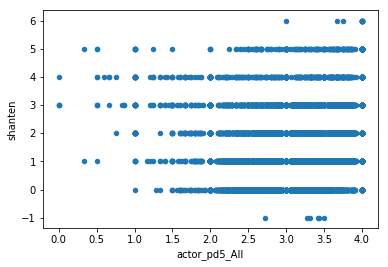

In [59]:
dfDiscards.plot(x="actor_pd5_All",y="shanten",kind="scatter")

#### Not a very helpful visualization...

I wanna make the other columns and see if those are more helpful.

In [60]:
# vals = [1,2,3,4,5,6,7,8,9]
# N = 3
# print(vals[-N:])

In [61]:
def ppd5_LastN(df,col,N):
    vals = df.copy()[col].values
    nuValz = []
    for i in range(len(vals)):
        nuValz.append(np.mean(vals[i][-N:]))
    return nuValz

#### So what values of N are going to be helpful here... not 1, because looking at someone's last tile they discarded isn't all that helpful. The last 2 aren't great either...

#### Whoa... maybe I could use some kind of weighting system that favors more recent tiles and use /all/ the tiles...

#### Well for now, I'm just going to make these 3,4,5,6, and 7 last tile columns and see what happens.

In [62]:
enlist = [3,4,5,6,7]

In [63]:
for i in range(len(enlist)):
    someColName = "actor_pd5_" + str(enlist[i])
    dfDiscards[someColName] = ppd5_LastN(dfDiscards,"actorPondDist5",enlist[i])

/home/tpeach/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [64]:
dfDiscards[["shanten","actor_pd5_All"]].groupby("shanten").mean()

,actor_pd5_All
shanten,
-1,3.275488
0,2.996880
1,3.217145
2,3.461330
3,3.627336
4,3.677744
5,3.580491
6,3.868056


#### Much better, yeah this shows how as you approach 0 shanten (1 away from winning), you generally discard more middleton tiles.

In [65]:
dfDiscards[["shanten","actor_pd5_3"]].groupby("shanten").mean()

,actor_pd5_3
shanten,
-1,3.055556
0,2.631091
1,2.925451
2,3.283046
3,3.548316
4,3.642619
5,3.487277
6,3.833333


In [66]:
dfDiscards[["shanten","actor_pd5_4"]].groupby("shanten").mean()

,actor_pd5_4
shanten,
-1,2.916667
0,2.666719
1,2.968085
2,3.328791
3,3.565602
4,3.656424
5,3.513359
6,3.833333


In [67]:
dfDiscards[["shanten","actor_pd5_5"]].groupby("shanten").mean()

,actor_pd5_5
shanten,
-1,2.966667
0,2.705198
1,3.013287
2,3.361964
3,3.582942
4,3.660632
5,3.525827
6,3.845833


In [68]:
dfDiscards[["shanten","actor_pd5_6"]].groupby("shanten").mean()

,actor_pd5_6
shanten,
-1,3.083333
0,2.742974
1,3.054090
2,3.388736
3,3.593968
4,3.666132
5,3.539483
6,3.854167


In [69]:
dfDiscards[["shanten","actor_pd5_7"]].groupby("shanten").mean()

,actor_pd5_7
shanten,
-1,2.976190
0,2.780833
1,3.090310
2,3.409070
3,3.601827
4,3.669393
5,3.552084
6,3.860119


### Okay so a clear trend, regardless of the metric we use, although looking at somewhere from the last 3 to 7 rather than all seems to be better at differentiating.  Seems like the average tenpai hand has something like 2.6-2.7 average distance from the 5-tile.

### So now we have to look at the distribution of those averages at tenpai.

(array([   1.,    0.,    0.,    0.,    0.,    7.,    0.,    0.,   13.,
           0.,    0.,   28.,    0.,   39.,    0.,    3.,   77.,    1.,
           3.,  130.,    0.,    0.,  225.,    0.,    0.,  278.,    3.,
         324.,    0.,    2.,  423.,    2.,    6.,  384.,    0.,    0.,
         359.,    0.,  314.,    7.,    5.,  236.,    0.,    9.,  153.,
           4.,    2.,   94.,    0.,   49.]),
 array([ 0.4  ,  0.472,  0.544,  0.616,  0.688,  0.76 ,  0.832,  0.904,
         0.976,  1.048,  1.12 ,  1.192,  1.264,  1.336,  1.408,  1.48 ,
         1.552,  1.624,  1.696,  1.768,  1.84 ,  1.912,  1.984,  2.056,
         2.128,  2.2  ,  2.272,  2.344,  2.416,  2.488,  2.56 ,  2.632,
         2.704,  2.776,  2.848,  2.92 ,  2.992,  3.064,  3.136,  3.208,
         3.28 ,  3.352,  3.424,  3.496,  3.568,  3.64 ,  3.712,  3.784,
         3.856,  3.928,  4.   ]),
 <a list of 50 Patch objects>)

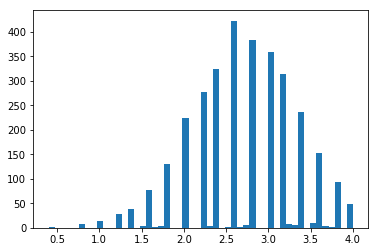

In [70]:
plt.hist(dfDiscards[["shanten","actor_pd5_5"]][dfDiscards["shanten"]==0]["actor_pd5_5"],bins=50)

(array([   1.,    0.,    1.,    2.,    0.,    0.,    4.,    0.,    0.,
          17.,    0.,   24.,    1.,    1.,   31.,    6.,    0.,   70.,
           5.,    1.,  150.,    0.,  206.,    0.,    0.,  279.,   10.,
           6.,  387.,   24.,  457.,   11.,   26.,  583.,    0.,    0.,
         708.,    0.,    0.,  707.,   38.,  604.,    0.,   75.,  485.,
          37.,   63.,  387.,    0.,  408.]),
 array([ 0.33333333,  0.40666667,  0.48      ,  0.55333333,  0.62666667,
         0.7       ,  0.77333333,  0.84666667,  0.92      ,  0.99333333,
         1.06666667,  1.14      ,  1.21333333,  1.28666667,  1.36      ,
         1.43333333,  1.50666667,  1.58      ,  1.65333333,  1.72666667,
         1.8       ,  1.87333333,  1.94666667,  2.02      ,  2.09333333,
         2.16666667,  2.24      ,  2.31333333,  2.38666667,  2.46      ,
         2.53333333,  2.60666667,  2.68      ,  2.75333333,  2.82666667,
         2.9       ,  2.97333333,  3.04666667,  3.12      ,  3.19333333,
         3.26666

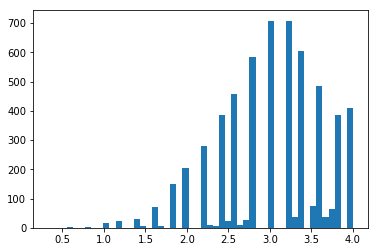

In [71]:
plt.hist(dfDiscards[["shanten","actor_pd5_5"]][dfDiscards["shanten"]==1]["actor_pd5_5"],bins=50)

(array([  1.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   3.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   2.40000000e+01,
          0.00000000e+00,   0.00000000e+00,   9.00000000e+00,
          1.00000000e+00,   2.20000000e+01,   0.00000000e+00,
          5.00000000e+00,   5.00000000e+01,   6.00000000e+00,
          5.00000000e+00,   7.30000000e+01,   0.00000000e+00,
          0.00000000e+00,   1.32000000e+02,   0.00000000e+00,
          0.00000000e+00,   1.36000000e+02,   1.80000000e+01,
          2.10000000e+02,   0.00000000e+00,   4.80000000e+01,
          2.57000000e+02,   3.40000000e+01,   4.30000000e+01,
          3.81000000e+02,   0.00000000e+00,   0.00000000e+00,
          5.44000000e+02,   0.00000000e+00,   4.65000000e+02,
          7.20000000e+01,   6.20000000e+01,   5.41000000e+02,
          0.00000000e+00,   1.76000000e+02,   5.16000000e+02,
          1.31000000e+02,   1.65000000e+02,   5.29000000e+02,
        

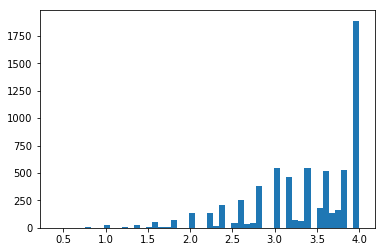

In [72]:
plt.hist(dfDiscards[["shanten","actor_pd5_5"]][dfDiscards["shanten"]==2]["actor_pd5_5"],bins=50)

(array([  3.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          3.00000000e+00,   2.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   2.00000000e+00,   0.00000000e+00,
          1.40000000e+01,   0.00000000e+00,   0.00000000e+00,
          1.10000000e+01,   3.00000000e+00,   9.00000000e+00,
          7.00000000e+00,   0.00000000e+00,   1.90000000e+01,
          5.00000000e+00,   3.40000000e+01,   0.00000000e+00,
          0.00000000e+00,   7.60000000e+01,   0.00000000e+00,
          6.50000000e+01,   8.00000000e+00,   1.10000000e+01,
          8.50000000e+01,   3.00000000e+01,   1.02000000e+02,
          1.90000000e+01,   1.03000000e+02,   0.00000000e+00,
          0.00000000e+00,   2.24000000e+02,   0.00000000e+00,
          0.00000000e+00,   1.64000000e+02,   3.00000000e+01,
          1.83000000e+02,   1.29000000e+02,   0.00000000e+00,
          3.21000000e+02,   8.90000000e+01,   1.91000000e+02,
        

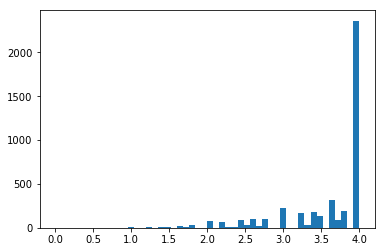

In [73]:
plt.hist(dfDiscards[["shanten","actor_pd5_5"]][dfDiscards["shanten"]==3]["actor_pd5_5"],bins=50)

(array([  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          2.00000000e+00,   1.00000000e+00,   2.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.40000000e+01,   0.00000000e+00,   0.00000000e+00,
          5.00000000e+00,   2.00000000e+00,   5.00000000e+00,
          4.00000000e+00,   0.00000000e+00,   1.40000000e+01,
          1.00000000e+00,   7.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   2.30000000e+01,   0.00000000e+00,
          1.50000000e+01,   2.00000000e+00,   1.00000000e+00,
          2.00000000e+01,   4.00000000e+00,   1.70000000e+01,
          2.00000000e+00,   3.00000000e+01,   0.00000000e+00,
          0.00000000e+00,   6.90000000e+01,   0.00000000e+00,
          0.00000000e+00,   2.90000000e+01,   1.00000000e+01,
          4.30000000e+01,   3.40000000e+01,   0.00000000e+00,
          4.80000000e+01,   1.60000000e+01,   3.40000000e+01,
        

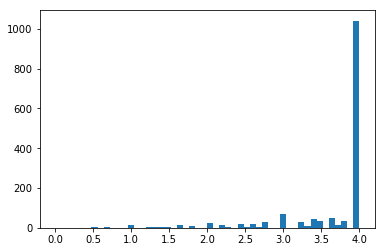

In [74]:
plt.hist(dfDiscards[["shanten","actor_pd5_5"]][dfDiscards["shanten"]==4]["actor_pd5_5"],bins=50)

#### Okay so around 0 shanten (tenpai) and 1 shanten, it's hard to tell, but this metric is /REALLY/ good at figuring out if it's further away.  Once it hits 2 shanten, the average is way higher.  Maybe we only care if they're pretty close? We'll see.


#### So yeah I'm still not sure how exactly to structure the target, and this will be an ongoing play-it-by-ear type thing where I'm seeing how much information I can even get, how sure I can even be about whether someone is 0 shanten... but yeah regardless, this feature is good.

#### Oh and I think the next thing I should do is make a feature that looks at open meld count, because that's a dead giveaway in certain circumstances.

#### If someone has 4 open melds, they are /by definition/ in tenpai, if they have 3 open, very likely tenpai, 2, idk but maybe, 1, who knows... maybe if it's late in hand idk, 0, no idea.

So yeah I'm going to create that column now (actorOpenMeldCount)

In [75]:
example = [22, 23, 23, 23, 23, 24, 46, 47, 48] #a tough example to break it (where the answer is 3 melds:)
#[22,23,24],[23,23,23],[46,47,48]

harderExample = [21, 21, 21, 22, 23, 24, 25, 25, 25, 25, 26, 27] 

def meldCounter(daList):
    #print("daList",daList)
    lisk = daList[:]
    meldCount = 0
    setLisk = set(lisk)
    kanCount = 0
    for i in setLisk:
        if lisk.count(i) == 4:
            kanCount += 1
    if kanCount == 0:
        return (len(lisk)/3)
    elif len(lisk) < 3:
        return 0
    elif len(lisk) < 6:
        return 1
    elif len(lisk) < 9:
        return 2
    elif len(lisk) < 12:
        return 3
    elif len(lisk) == 12 and kanCount == 3:
        return 3
    elif len(lisk) == 12 and kanCount != 3:
        return 4
    else:
        '''Just leaving the old function here because I kinda like it.'''
        try:
            while len(lisk) != 0:
                meldCountStart = meldCount
                while len(lisk) != 0:
                    #print("in first while")
                    if lisk[0] in lisk and (lisk[0]+1) in lisk and (lisk[0]+2) in lisk:
                        #print("in first if")
                        meldCount += 1
                        lisk.remove(lisk[0]+1)
                        lisk.remove(lisk[0]+2)
                        lisk.remove(lisk[0])
                        #print("lisk",lisk)
                    else:
                        break
                while len(lisk) != 0: 
                    #print("in second while")
                    if lisk.count(lisk[0]) == 3 or lisk.count(lisk[0]) == 4:
                        #print("in second if")
                        meldCount += 1
                        lisk = [i for i in lisk if i != lisk[0]]
                        #print("lisk",lisk)
                    else:
                        break
                if meldCountStart == meldCount:
                    break
            if len(lisk) != 0:
                return "ERROR WITH OPENS"
            else:
                return meldCount
        except:
            return "ERROR WITH OPENS"
        
print(meldCounter(harderExample))

4


In [76]:
def oMFoT(df, col):
    '''open melds from open tiles'''
    vals = df[col].copy().values
    for i in range(len(vals)):
        vals[i] = meldCounter(vals[i])
    return vals

In [77]:
dfDiscards["actorOpenMeldCount"] = oMFoT(dfDiscards,"actorOpenTiles")

/home/tpeach/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [78]:
dfDiscards["actorOpenMeldCount"].value_counts()

0.0    17377
1.0     2989
2.0     1226
3.0      166
Name: actorOpenMeldCount, dtype: int64

#### I'm actually kind of shocked that in 45 games there were literally no 4-opens.  Thinking about it though, this is probably because very good players /almost never/ 4-open, and they LOVE to not open at all.

In [79]:
dfDiscards.groupby("lobby").count()

,gameLogID,moveType,unconvertedTile,convertedTile,discDrawn,handNumber,moveNumber,roundWind,roundNumber,bonusSticks,...,shantenEngineeringColumn,shanten,actorPondDist5,actor_pd5_All,actor_pd5_3,actor_pd5_4,actor_pd5_5,actor_pd5_6,actor_pd5_7,actorOpenMeldCount
lobby,,,,,,,,,,,,,,,,,,,,,
houou,21758,21758,21758,21758,21758,21758,21758,21758,21758,21758,...,21758,21758,21758,21758,21758,21758,21758,21758,21758,21758


#### Yeah the vast majority of these 45 games I'm using for some basic EDA are at least upperdan (where I would play) and mostly houou (where the top players play), and honestly main lobby players are probably the only people who semi-consistently 4-open, although I'll be sure to verify that later.

#### Anyhow, yeah -- looks like people don't usually open:

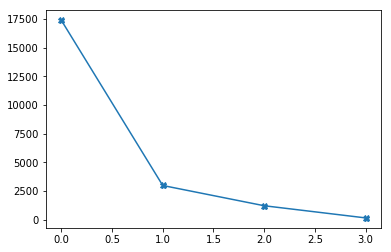

In [80]:
plt.plot(dfDiscards["actorOpenMeldCount"].value_counts(),marker="X")

In [81]:
dfDiscards[["shanten","actorOpenMeldCount"]].groupby("actorOpenMeldCount").mean()

,shanten
actorOpenMeldCount,
0.0,2.018070
1.0,1.270994
2.0,0.761827
3.0,0.277108


#### If that isn't a trend I don't know what is.

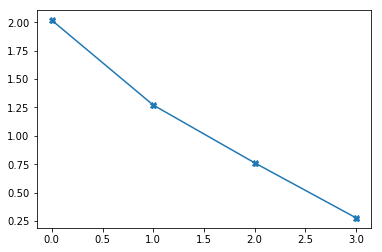

In [82]:
plt.plot(dfDiscards[["shanten","actorOpenMeldCount"]].groupby("actorOpenMeldCount").mean(),marker="X")

#### Similar in many ways to the former graph, although notably different at 1 open meld and what that means on average.

### So there's a lot of things I could look at that don't require engineering.  I just really wanted to finish those engineering ones up because they're harder.

#### Let's take a look at how score affects average shanten.

In [83]:
len(set(dfDiscards["actorScore"].values))

192

#### Eh, 193 hands... (I'm not using all the data right now idk I want these processes to be fast) this isn't a super large number... but the shanten will vary a lot so let's take a look anyways:

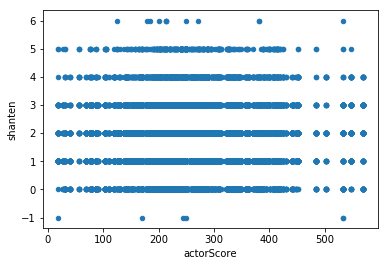

In [84]:
dfDiscards.plot(x="actorScore",y="shanten",kind="scatter")

#### All this seems to inform me of is that the few (11) times people turned down a winning hand, it was because their score wasn't off the charts, and so maybe they wanted more.

#### Other than that this graph is useless.

In [85]:
dfDiscards[["shanten","actorScore"]][dfDiscards["shanten"] == -1]

,shanten,actorScore
143,-1,250
2205,-1,533
2241,-1,533
4262,-1,19
10234,-1,171
27611,-1,245


In [86]:
np.mean(dfDiscards[["shanten","actorScore"]][dfDiscards["shanten"] == -1]["actorScore"])

291.8333333333333

#### The starting score in Mahjong is 25000 pts, expressed here and in the original .mjlog files provided by tenhou.net as 250, because there is never a case where you interact with point sticks less than 100 in value, rendering the last two 0s in the conventional scoring redundant.

#### Aren't pennies inefficient to mass produce or something?  Are we ever going to make a move on that?

#### Anyways yeah these are lower scores, meaning they might have been seeking higher value for their hand, although I'm not entirely sure.

In [87]:
dfDiscards[["shanten","actorScore"]].groupby("shanten").mean()

,actorScore
shanten,
-1,291.833333
0,258.612700
1,260.314015
2,262.011147
3,259.908014
4,267.379426
5,256.430025
6,262.250000


## <font color=green>Alright so not the most complete EDA, but definitely some useful stuff here.  I need to do much more.  I'm tired and I'm gonna stop it here for now, and in the morning I'll get this together in the way necessary and send it over.</font>

### So I have returned and now I want to take the bits that I have and see how well models are able to predict shanten.  Maybe we bucket the shanten into [0 and 1 shanten] vs [other shanten] and we just ignore the -1 outliers.

In [88]:
dfDiscards.columns.values

array(['gameLogID', 'lobby', 'moveType', 'unconvertedTile',
       'convertedTile', 'discDrawn', 'handNumber', 'moveNumber',
       'roundWind', 'roundNumber', 'bonusSticks',
       'unconvertedDoraIndicator', 'convertedDoraIndicator',
       'convertedDora', 'actorWind', 'actorRating', 'rightRating',
       'acrossRating', 'leftRating', 'actorRank', 'rightRank',
       'acrossRank', 'leftRank', 'actorScore', 'rightScore', 'acrossScore',
       'leftScore', 'actorHandConverted', 'actorHandUnconverted',
       'rightHandConverted', 'rightHandUnconverted', 'acrossHandConverted',
       'acrossHandUnconverted', 'leftHandConverted', 'leftHandUnconverted',
       'actorUnconvertedPond', 'actorConvertedPond',
       'rightUnconvertedPond', 'rightConvertedPond',
       'acrossUnconvertedPond', 'acrossConvertedPond',
       'leftUnconvertedPond', 'leftConvertedPond', 'actorReachStatus',
       'rightReachStatus', 'acrossReachStatus', 'leftReachStatus',
       'actorIsOpen', 'rightIsOpen', 'acr

In [89]:
X = dfDiscards[['actor_pd5_5','actorOpenMeldCount','moveNumber','handNumber']]
y = dfDiscards["shanten"]

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [92]:
dtc = DecisionTreeClassifier()

In [93]:
kf = KFold(n_splits=5,shuffle=True,random_state=42)
scores = cross_val_score(dtc,X_train,y_train,cv=kf)
print(np.mean(scores))
print(np.std(scores))
print(scores)

0.349797416668
0.00467961000797
[ 0.35355392  0.34987745  0.35171569  0.34079068  0.35304934]


In [94]:
dfDiscards["shanten"].value_counts()

 2    6549
 1    5815
 3    4305
 0    3181
 4    1497
 5     393
 6      12
-1       6
Name: shanten, dtype: int64

In [95]:
print("baseline",6043./(6043+5519+3964+2848+1295+282+11+9))
print("basic dtc",np.mean(scores))

baseline 0.30258875369285465
basic dtc 0.349797416668


In [96]:
rfc = RandomForestClassifier()

In [97]:
kf = KFold(n_splits=5,shuffle=True,random_state=42)
scores = cross_val_score(rfc,X_train,y_train,cv=kf)
print(np.mean(scores))
print(np.std(scores))
print(scores)

0.36603696451
0.00753242465287
[ 0.37469363  0.35723039  0.375       0.35917867  0.36408213]


In [98]:
from sklearn.grid_search import GridSearchCV

/home/tpeach/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/tpeach/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [99]:
# paramz = {
#     "n_estimators":[5,11,15,21,51,101],
#     "max_depth":[3,5,7,9,None]
# }

# gscv = GridSearchCV(rfc,paramz)
# bestForest = gscv.fit(X_train,y_train)
# bestForest.best_params_

In [100]:
# kf = KFold(n_splits=5,shuffle=True,random_state=42)
# scores = cross_val_score(bestForest.best_estimator_,X_train,y_train,cv=kf)
# print(np.mean(scores))
# print(np.std(scores))
# print(scores)

In [101]:
#preds = bestForest.best_estimator_.predict(X_test)

In [102]:
type(y_test.values)

numpy.ndarray

### Random forests are really good o_o.

In [103]:
# def averageDifference(y_true,y_pred):
#     movingSum = 0
#     n = len(y_true)
#     for i in range(len(y_true)):
#         movingSum += abs(y_true[i] - y_pred[i])
#     return float(movingSum)/n

In [104]:
# print(averageDifference(y_test.values,preds))

### So on average it isn't off by much.  It's not guessing randomly.

In [105]:
# nuDf = pd.DataFrame()

In [106]:
# nuDf["preds"] = preds

In [107]:
# nuDf["preds"].value_counts()

In [108]:
y_test.value_counts()

 2    1621
 1    1449
 3    1095
 0     815
 4     365
 5      93
-1       1
 6       1
Name: shanten, dtype: int64

### I wanna convert the shanten column to "tenpai" and "not tenpai"

In [109]:
dfDiscards["shanten"]

1        2
3        3
5        3
7        5
9        2
11       2
13       3
15       3
17       2
19       3
21       2
23       3
25       2
27       3
29       2
31       3
33       2
35       3
37       2
39       2
41       1
43       2
45       2
47       1
49       1
51       2
53       2
55       1
57       2
59       2
        ..
44007    0
44009    2
44011    1
44013    2
44015    0
44017    2
44019    1
44021    2
44023    0
44025    1
44027    1
44029    2
44031    0
44033    1
44035    2
44037    1
44039    0
44041    0
44043    2
44045    2
44047    0
44049    0
44051    2
44053    2
44055    0
44057    1
44059    2
44061    2
44063    0
44066    0
Name: shanten, Length: 21758, dtype: int64

In [110]:
vvv = dfDiscards["shanten"].copy().values
for i in range(len(vvv)):
    if vvv[i] == 0 or vvv[i] == -1:
        vvv[i] = 1
    else:
        vvv[i] = 0
dfDiscards["isTenpai"] = vvv

/home/tpeach/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [111]:
dfDiscards["isTenpai"].value_counts()

0    18571
1     3187
Name: isTenpai, dtype: int64

In [112]:
print("baseline",17112./(17112+2859))

baseline 0.8568424215111913


In [113]:
rfc = RandomForestClassifier()

In [114]:
X = dfDiscards[['actor_pd5_5','actorOpenMeldCount','moveNumber','handNumber']]
y = dfDiscards["isTenpai"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [115]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [116]:
kf = KFold(n_splits=5,shuffle=True,random_state=42)
scores = cross_val_score(rfc,X_train,y_train,cv=kf)
print(np.mean(scores))
print(np.std(scores))
print(scores)

0.838153381947
0.0061201454525
[ 0.84007353  0.84742647  0.84007353  0.82960466  0.83358872]


In [117]:
# paramz = {
#     "n_estimators":[5,11,15,21,51,101],
#     "max_depth":[3,5,7,9,None]
# }

# gscv = GridSearchCV(rfc,paramz)
# bestForest = gscv.fit(X_train,y_train)

In [118]:
# kf = KFold(n_splits=5,shuffle=True,random_state=42)
# scores = cross_val_score(bestForest.best_estimator_,X_train,y_train,cv=kf)
# print(np.mean(scores))
# print(np.std(scores))
# print(scores)

In [119]:
# bestForest.best_estimator_.feature_importances_

In [120]:
# bestForest.best_params_

### So this is overwhelmingly saying "how late it is in the hand is very important."

### This means I should probably just use how many discards a person has made, because that is what is actually contributing to this.

In [121]:
#dfDiscards["actorPondCount"].value_counts()

In [122]:
#dfDiscards.groupby("actorPondCount")

In [123]:
dfDiscards.head(20)

,gameLogID,lobby,moveType,unconvertedTile,convertedTile,discDrawn,handNumber,moveNumber,roundWind,roundNumber,...,shanten,actorPondDist5,actor_pd5_All,actor_pd5_3,actor_pd5_4,actor_pd5_5,actor_pd5_6,actor_pd5_7,actorOpenMeldCount,isTenpai
1,2016082221gm-00a9-0000-ebc65731,houou,discard,134,120,[0],1,2,east,1,...,2,[4],4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,0,0
3,2016082221gm-00a9-0000-ebc65731,houou,discard,33,9,[0],1,4,east,1,...,3,[4],4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,0,0
5,2016082221gm-00a9-0000-ebc65731,houou,discard,1,1,[1],1,6,east,1,...,3,[4],4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,0,0
7,2016082221gm-00a9-0000-ebc65731,houou,discard,101,48,[0],1,8,east,1,...,5,[3],3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,0,0
9,2016082221gm-00a9-0000-ebc65731,houou,discard,118,80,"[0, 1]",1,10,east,1,...,2,"[4, 4]",4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,0,0
11,2016082221gm-00a9-0000-ebc65731,houou,discard,125,100,"[0, 0]",1,12,east,1,...,2,"[4, 4]",4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,0,0
13,2016082221gm-00a9-0000-ebc65731,houou,discard,127,100,"[1, 0]",1,14,east,1,...,3,"[4, 4]",4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,0,0
15,2016082221gm-00a9-0000-ebc65731,houou,discard,124,100,"[0, 0]",1,16,east,1,...,3,"[3, 4]",3.500000,3.500000,3.500000,3.500000,3.500000,3.500000,0,0
17,2016082221gm-00a9-0000-ebc65731,houou,discard,22,6,"[0, 1, 1]",1,18,east,1,...,2,"[4, 4, 1]",3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,0,0
19,2016082221gm-00a9-0000-ebc65731,houou,discard,130,110,"[0, 0, 0]",1,20,east,1,...,3,"[4, 4, 4]",4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,0,0


In [124]:
dfDiscards.groupby("shanten").mean()["actorPondCount"]

shanten
-1    14.166667
 0    10.752279
 1     8.696991
 2     6.367537
 3     4.495935
 4     3.080160
 5     4.002545
 6     3.666667
Name: actorPondCount, dtype: float64

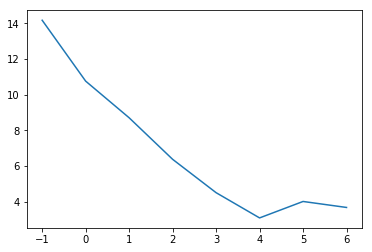

In [125]:
plt.plot(dfDiscards.groupby("shanten").mean()["actorPondCount"])

In [126]:
X = dfDiscards[['actor_pd5_5','actorOpenMeldCount',"actorPondCount"]]
y = dfDiscards["isTenpai"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
rfc = RandomForestClassifier()
kf = KFold(n_splits=5,shuffle=True,random_state=42)
scores = cross_val_score(rfc,X_train,y_train,cv=kf)
print(np.mean(scores))
print(np.std(scores))
print(scores)

0.848387389357
0.00691898277509
[ 0.84865196  0.85631127  0.85477941  0.83726632  0.84492798]


In [127]:
# paramz = {
#     "n_estimators":[5,11,15,21,51,101],
#     "max_depth":[3,5,7,9,None]
# }

# gscv = GridSearchCV(rfc,paramz)
# bestForest = gscv.fit(X_train,y_train)

In [128]:
# kf = KFold(n_splits=5,shuffle=True,random_state=42)
# scores = cross_val_score(gscv.best_estimator_,X_train,y_train,cv=kf)
# print(np.mean(scores))
# print(np.std(scores))
# print(scores)

In [129]:
#gscv.best_params_

In [130]:
#gscv.best_estimator_.feature_importances_

In [131]:
#dfDiscards[['actor_pd5_5','actorOpenMeldCount',"actorPondCount","shanten"]].corr()

In [132]:
#dfDiscards.info()

actorOpenMeldCount was object somehow

In [133]:
dfDiscards['actorOpenMeldCount'] = dfDiscards['actorOpenMeldCount'].astype(int)

/home/tpeach/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [134]:
#dfDiscards.info()

In [135]:
dfDiscards[['actor_pd5_5','actorOpenMeldCount',"actorPondCount"]].corr()

,actor_pd5_5,actorOpenMeldCount,actorPondCount
actor_pd5_5,1.000000,-0.241394,-0.452080
actorOpenMeldCount,-0.241394,1.000000,0.288839
actorPondCount,-0.452080,0.288839,1.000000


In [136]:
from sklearn.decomposition import PCA

In [137]:
pca = PCA(n_components=3)

In [138]:
X = dfDiscards[['actor_pd5_5','actorOpenMeldCount',"actorPondCount"]]
y = dfDiscards["isTenpai"]

In [139]:
X = pca.fit_transform(X)

In [140]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [141]:
# paramz = {
#     "n_estimators":[5,11,15,21,51,101],
#     "max_depth":[3,5,7,9,None]
# }

# gscv = GridSearchCV(rfc,paramz)
# bestForest = gscv.fit(X_train,y_train)

In [142]:
# kf = KFold(n_splits=5,shuffle=True,random_state=42)
# scores = cross_val_score(bestForest.best_estimator_,X_train,y_train,cv=kf)
# print(np.mean(scores))
# print(np.std(scores))
# print(scores)

### No difference as a result of pca (colinearity reduction.) because RandomForests don't care about that. Oops.

In [143]:
dfDiscards.groupby("actorPondCount").mean()["shanten"]

actorPondCount
0     3.250000
1     3.182967
2     2.831699
3     2.503489
4     2.209565
5     1.961433
6     1.756084
7     1.585366
8     1.427685
9     1.301322
10    1.197958
11    1.089469
12    1.062500
13    1.025435
14    1.006525
15    0.998020
16    1.057279
17    1.063670
18    0.986667
19    0.647059
20    0.250000
Name: shanten, dtype: float64

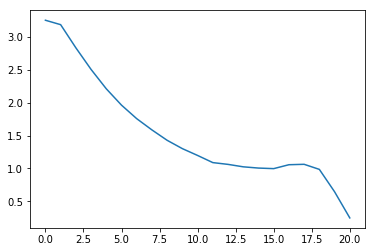

In [144]:
plt.plot(dfDiscards.groupby("actorPondCount").mean()["shanten"])

In [145]:
dfDiscards.columns

Index(['gameLogID', 'lobby', 'moveType', 'unconvertedTile', 'convertedTile',
       'discDrawn', 'handNumber', 'moveNumber', 'roundWind', 'roundNumber',
       'bonusSticks', 'unconvertedDoraIndicator', 'convertedDoraIndicator',
       'convertedDora', 'actorWind', 'actorRating', 'rightRating',
       'acrossRating', 'leftRating', 'actorRank', 'rightRank', 'acrossRank',
       'leftRank', 'actorScore', 'rightScore', 'acrossScore', 'leftScore',
       'actorHandConverted', 'actorHandUnconverted', 'rightHandConverted',
       'rightHandUnconverted', 'acrossHandConverted', 'acrossHandUnconverted',
       'leftHandConverted', 'leftHandUnconverted', 'actorUnconvertedPond',
       'actorConvertedPond', 'rightUnconvertedPond', 'rightConvertedPond',
       'acrossUnconvertedPond', 'acrossConvertedPond', 'leftUnconvertedPond',
       'leftConvertedPond', 'actorReachStatus', 'rightReachStatus',
       'acrossReachStatus', 'leftReachStatus', 'actorIsOpen', 'rightIsOpen',
       'acrossIsOpen', 'l

In [146]:
noReachDf = dfDiscards[dfDiscards['actorReachStatus']==0][dfDiscards['leftReachStatus']==0][dfDiscards['rightReachStatus']==0][dfDiscards['acrossReachStatus']==0]

/home/tpeach/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [147]:
#len(dfDiscards)

In [148]:
noReachDf.groupby("actorPondCount").mean()["shanten"]

actorPondCount
0     3.250000
1     3.189950
2     2.844408
3     2.525499
4     2.246746
5     2.012070
6     1.812298
7     1.658482
8     1.496916
9     1.414365
10    1.273625
11    1.167619
12    1.113350
13    0.987730
14    0.892430
15    0.893401
16    0.960265
17    0.850467
18    0.800000
19    0.521739
20    0.250000
Name: shanten, dtype: float64

In [149]:
noReachDf.groupby("shanten").mean()["actor_pd5_5"]

shanten
-1    2.920000
 0    2.726233
 1    3.030613
 2    3.423870
 3    3.657203
 4    3.700503
 5    3.551757
 6    3.886364
Name: actor_pd5_5, dtype: float64

# 3 very important thoughts:

### 1) From seeing the EDA, and then reflecting about my own experience and knowledge of mahjong, it seems that all you can know is that someone is /close/ (1 away or 2 away) You can't really know if they're 1 away.  At least with this data.

### 2) Relating to resolving this, I want to collect the data about "Are they throwing away what they just drew" -- and I really particularly would like to study this for weaker players because I believe there would be a difference, where at the high levels I feel like they would hide this.  I mean I know enough to hide it by throwing a tile from inside my hand rather than the one I just drew if I have the option.

### 3) We do not have the data on how quickly people are getting rid of a tile after they draw.  I feel like the quicker someone is discarding, especially when they are also getting rid of mostly things they draw, the closer they are.

## okay so I just retrieved the "did he just discard what he drew" column

In [150]:
dfDiscards.columns

Index(['gameLogID', 'lobby', 'moveType', 'unconvertedTile', 'convertedTile',
       'discDrawn', 'handNumber', 'moveNumber', 'roundWind', 'roundNumber',
       'bonusSticks', 'unconvertedDoraIndicator', 'convertedDoraIndicator',
       'convertedDora', 'actorWind', 'actorRating', 'rightRating',
       'acrossRating', 'leftRating', 'actorRank', 'rightRank', 'acrossRank',
       'leftRank', 'actorScore', 'rightScore', 'acrossScore', 'leftScore',
       'actorHandConverted', 'actorHandUnconverted', 'rightHandConverted',
       'rightHandUnconverted', 'acrossHandConverted', 'acrossHandUnconverted',
       'leftHandConverted', 'leftHandUnconverted', 'actorUnconvertedPond',
       'actorConvertedPond', 'rightUnconvertedPond', 'rightConvertedPond',
       'acrossUnconvertedPond', 'acrossConvertedPond', 'leftUnconvertedPond',
       'leftConvertedPond', 'actorReachStatus', 'rightReachStatus',
       'acrossReachStatus', 'leftReachStatus', 'actorIsOpen', 'rightIsOpen',
       'acrossIsOpen', 'l

In [151]:
#noReachDf.columns

In [152]:
#noReachDf.groupby("discardedTheDraw").mean()["shanten"]

In [153]:
noReachDf.groupby("whosTurn").mean()["shanten"]

whosTurn
0    2.036921
1    2.033301
2    2.095481
3    2.007759
Name: shanten, dtype: float64

In [154]:
#noReachDf[["actorScore","leftScore",'acrossScore','rightScore']].tail(20)
# Score column doesn't work right now apparently. Oh well.

In [155]:
#noReachDf.groupby(["handNumber","whosTurn"]).mean()["shanten"]

In [156]:
#noReachDf[noReachDf["whosTurn"]==0]

In [157]:
#noReachDf[['gameLogID','handNumber','whosTurn', 'discardedTheDraw']].head()

In [158]:
#noReachDf[noReachDf["whosTurn"]==0].head() #so this is one person's progression through each entire game.

### added list of 0s and 1s for discards, where 0 if player did not discard what was drawn, and 1 is did discard drawn

In [159]:
noReachDf["discDrawn"].values[0]

'[0]'

In [160]:
valx = noReachDf["discDrawn"].copy().values

for i in range(len(valx)):
    valx[i] = valx[i].split("[")[1].split("]")[0].split(",")
    for j in range(len(valx[i])):
        valx[i][j] = int(valx[i][j])

noReachDf["discDrawn"] = valx

In [161]:
type(noReachDf["discDrawn"].values[0][0])

int

In [162]:
noReachDf.head()

,gameLogID,lobby,moveType,unconvertedTile,convertedTile,discDrawn,handNumber,moveNumber,roundWind,roundNumber,...,shanten,actorPondDist5,actor_pd5_All,actor_pd5_3,actor_pd5_4,actor_pd5_5,actor_pd5_6,actor_pd5_7,actorOpenMeldCount,isTenpai
1,2016082221gm-00a9-0000-ebc65731,houou,discard,134,120,[0],1,2,east,1,...,2,[4],4.0,4.0,4.0,4.0,4.0,4.0,0,0
3,2016082221gm-00a9-0000-ebc65731,houou,discard,33,9,[0],1,4,east,1,...,3,[4],4.0,4.0,4.0,4.0,4.0,4.0,0,0
5,2016082221gm-00a9-0000-ebc65731,houou,discard,1,1,[1],1,6,east,1,...,3,[4],4.0,4.0,4.0,4.0,4.0,4.0,0,0
7,2016082221gm-00a9-0000-ebc65731,houou,discard,101,48,[0],1,8,east,1,...,5,[3],3.0,3.0,3.0,3.0,3.0,3.0,0,0
9,2016082221gm-00a9-0000-ebc65731,houou,discard,118,80,"[0, 1]",1,10,east,1,...,2,"[4, 4]",4.0,4.0,4.0,4.0,4.0,4.0,0,0


In [163]:
def averageDiscDrawCols(df,n):
    '''makes columns for average of 0 or 1 where they represent whether or not someone discarded the tile they drew.'''
    valx = 0
    valx = noReachDf["discDrawn"].copy().values
    for i in range(len(valx)):
        #print(valx[i])
        valx[i] = sum(valx[i][-n::])/float(n)
        #print(valx[i])
    return valx
        

In [164]:

for i in range(3,8):
    colString = "avgDDL" + str(i)
    noReachDf[colString] = averageDiscDrawCols(noReachDf,i)

In [165]:
for i in range(3,8):
    colString = "avgDDL" + str(i)
    noReachDf[colString] = noReachDf[colString].astype(float)

In [166]:
noReachDf["avgDDAll"] = averageDiscDrawCols(noReachDf,40)
noReachDf["avgDDAll"] = noReachDf["avgDDAll"].astype(float)

In [167]:
noReachDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16528 entries, 1 to 44004
Data columns (total 77 columns):
gameLogID                   16528 non-null object
lobby                       16528 non-null object
moveType                    16528 non-null object
unconvertedTile             16528 non-null int64
convertedTile               16528 non-null int64
discDrawn                   16528 non-null object
handNumber                  16528 non-null int64
moveNumber                  16528 non-null int64
roundWind                   16528 non-null object
roundNumber                 16528 non-null int64
bonusSticks                 16528 non-null int64
unconvertedDoraIndicator    16528 non-null object
convertedDoraIndicator      16528 non-null object
convertedDora               16528 non-null object
actorWind                   16528 non-null int64
actorRating                 16528 non-null float64
rightRating                 16528 non-null float64
acrossRating                16528 non-null flo

In [168]:
noReachDf.groupby("shanten").mean()[["avgDDL3","avgDDL4","avgDDL5","avgDDL6","avgDDL7","avgDDAll"]]

,avgDDL3,avgDDL4,avgDDL5,avgDDL6,avgDDL7,avgDDAll
shanten,,,,,,
-1,0.533333,0.550000,0.600000,0.633333,0.600000,0.165000
0,0.554351,0.535050,0.512781,0.490059,0.466748,0.112548
1,0.429161,0.401651,0.374874,0.348426,0.322689,0.067693
2,0.278286,0.252846,0.229408,0.207999,0.189001,0.036910
3,0.180084,0.157729,0.139503,0.123830,0.110610,0.021109
4,0.128445,0.109813,0.094896,0.083034,0.073842,0.014109
5,0.193694,0.170946,0.149730,0.133784,0.120077,0.023041
6,0.060606,0.068182,0.090909,0.075758,0.064935,0.011364


In [169]:
noReachDf.groupby("isTenpai").mean()[["avgDDL3","avgDDL4","avgDDL5","avgDDL6","avgDDL7","avgDDAll"]]

,avgDDL3,avgDDL4,avgDDL5,avgDDL6,avgDDL7,avgDDAll
isTenpai,,,,,,
0,0.281491,0.256926,0.234677,0.214242,0.195763,0.039409
1,0.554270,0.535108,0.513117,0.490612,0.467262,0.112751


In [170]:
X = noReachDf[['actor_pd5_5','actorOpenMeldCount',"actorPondCount","avgDDL7"]]
y = noReachDf["isTenpai"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,stratify=y)
rfc = RandomForestClassifier()
kf = KFold(n_splits=5,shuffle=True,random_state=42)
scores = cross_val_score(rfc,X_train,y_train,cv=kf)
print(np.mean(scores))
print(np.std(scores))
print(scores)

0.913358989707
0.00254881912192
[ 0.91532258  0.91448165  0.9160952   0.9092376   0.91165793]


In [171]:
noReachDf["isTenpai"].value_counts()

0    15232
1     1296
Name: isTenpai, dtype: int64

In [172]:
print(float(25150)/(25150+1794))

0.9334174584323041


In [173]:
X = noReachDf[['actor_pd5_5','actorOpenMeldCount',"actorPondCount","avgDDL7"]]
y = noReachDf["shanten"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
rfc = RandomForestClassifier()
kf = KFold(n_splits=5,shuffle=True,random_state=42)
scores = cross_val_score(rfc,X_train,y_train,cv=kf)
print(np.mean(scores))
print(np.std(scores))
print(scores)

0.415294896485
0.00286246951038
[ 0.41975806  0.41145623  0.41710367  0.41427995  0.41387656]


In [174]:
baseGuess = float(noReachDf["shanten"].value_counts()[2])
total = len(noReachDf["shanten"])

baseline = (baseGuess/total)
print(baseline)

0.32423765730880927


In [175]:
X = noReachDf[['actor_pd5_5','actorOpenMeldCount',"actorPondCount","avgDDL7"]]
y = noReachDf["shanten"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
rfc = RandomForestClassifier()

In [176]:
paramz = {
    "n_estimators":[5,11,15,21,51,101],
    "max_depth":[3,5,7,9,None]
}

gscv = GridSearchCV(rfc,paramz)
bestForest = gscv.fit(X_train,y_train)
bestForest.best_params_

{'max_depth': 7, 'n_estimators': 101}

In [177]:
kf = KFold(n_splits=5,shuffle=True,random_state=42)
scores = cross_val_score(bestForest.best_estimator_,X_train,y_train,cv=kf)
print(np.mean(scores))
print(np.std(scores))
print(scores)

0.456436485836
0.00739862542696
[ 0.46975806  0.44897136  0.45744252  0.45018152  0.45582896]


In [178]:
# kf = KFold(n_splits=5,shuffle=True,random_state=42)
# scores = cross_val_score(RandomForestClassifier(n_estimators=501),X_train,y_train,cv=kf)
# print(np.mean(scores))
# print(np.std(scores))
# print(scores)

In [179]:
nineDf = noReachDf[noReachDf["actorPondCount"]==9].copy()

In [180]:
X = nineDf[['actor_pd5_5','actorOpenMeldCount',"actorPondCount","avgDDL7"]]
y = nineDf["shanten"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
rfc = RandomForestClassifier(max_depth=5,n_estimators=15)
kf = KFold(n_splits=5,shuffle=True,random_state=42)
scores = cross_val_score(rfc,X_train,y_train,cv=kf)
print(np.mean(scores))
print(np.std(scores))
print(scores)

0.441089324619
0.0318874287571
[ 0.45588235  0.41911765  0.38970588  0.47407407  0.46666667]


In [181]:
nineDf["shanten"].value_counts()

1    411
2    259
0    132
3     73
4     18
5     12
Name: shanten, dtype: int64

In [182]:
baseGuess = float(nineDf["shanten"].value_counts()[1])
total = len(nineDf["shanten"])

baseline = (baseGuess/total)
print(baseline)

0.45414364640883975


below is back to modeling, but wanna try combinations of features

In [183]:
X = noReachDf[['actor_pd5_5',"actorPondCount","avgDDL7"]]
y = noReachDf["shanten"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
rfc = RandomForestClassifier(max_depth=5,n_estimators=15)
kf = KFold(n_splits=5,shuffle=True,random_state=42)
scores = cross_val_score(rfc,X_train,y_train,cv=kf)
print(np.mean(scores))
print(np.std(scores))
print(scores)

0.440383414228
0.00490964801817
[ 0.44758065  0.43485276  0.43485276  0.44251714  0.44211376]


In [184]:
baseGuess = float(noReachDf["shanten"].value_counts()[2])
total = len(noReachDf["shanten"])

baseline = (baseGuess/total)
print(baseline)

0.32423765730880927


In [185]:
X = noReachDf[['actor_pd5_5',"actorPondCount","avgDDL7",'actorOpenMeldCount']]
y = noReachDf["shanten"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
rfc = RandomForestClassifier(max_depth=5,n_estimators=15)
kf = KFold(n_splits=5,shuffle=True,random_state=42)
scores = cross_val_score(rfc,X_train,y_train,cv=kf)
print(np.mean(scores))
print(np.std(scores))
print(scores)

0.457000741714
0.00962646706179
[ 0.47580645  0.44856797  0.45421541  0.45219847  0.45421541]


In [186]:
#noReachDf.columns

In [187]:
X = noReachDf[['actor_pd5_5',"actorPondCount","avgDDL7",'actorOpenMeldCount']]
y = noReachDf["isTenpai"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
rfc = RandomForestClassifier(max_depth=5,n_estimators=15)
kf = KFold(n_splits=5,shuffle=True,random_state=42)
scores = cross_val_score(rfc,X_train,y_train,cv=kf)
print(np.mean(scores))
print(np.std(scores))
print(scores)

0.924975373785
0.00527751016546
[ 0.93024194  0.91690198  0.92819685  0.92053247  0.92900363]


In [188]:
baseGuess = float(noReachDf["isTenpai"].value_counts()[0])
total = len(noReachDf["isTenpai"])

baseline = (baseGuess/total)
print(baseline)

0.9215876089060987


In [189]:
from sklearn.preprocessing import StandardScaler

In [190]:
ss = StandardScaler()

In [191]:
from sklearn.neighbors import KNeighborsClassifier

In [192]:
X = noReachDf[['actor_pd5_5',"actorPondCount","avgDDL7",'actorOpenMeldCount']].values
y = noReachDf["isTenpai"]
X = ss.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
for i in range(3,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    kf = KFold(n_splits=5,shuffle=True,random_state=42)
    scores = cross_val_score(rfc,X_train,y_train,cv=kf)
    print(np.mean(scores),i)
    #print(np.std(scores))
    #print(scores)

0.924087951697 3
0.924410662468 4
0.924894663561 5
0.924168824578 6
0.924168726984 7
0.924249339614 8
0.924894793686 9
0.92562089292 10
0.925862828404 11
0.924733373238 12
0.924814050931 13
0.924330114901 14
0.924491437755 15
0.925136794233 16
0.925943278377 17
0.92586273081 18
0.924491632943 19
0.924894793686 20
0.925055953884 21
0.925056018946 22
0.924088114354 23
0.923926693906 24
0.924491307629 25
0.924410662468 26
0.924168694453 27
0.924087919166 28
0.923603983136 29
0.925782053117 30
0.924733308176 31
0.924410857656 32
0.923361950058 33
0.925298117087 34
0.923281304897 35
0.924491210035 36
0.924007176411 37
0.924491437755 38
0.924733438301 39
0.924975276191 40
0.924652630483 41
0.925056181603 42
0.924652728077 43
0.926104698825 44
0.924330114901 45
0.925298117087 46
0.926104763888 47
0.925298117087 48
0.924330147432 49


In [193]:
from sklearn.naive_bayes import BernoulliNB

In [194]:
X = noReachDf[['actor_pd5_5',"actorPondCount","avgDDL7",'actorOpenMeldCount']].values
y = noReachDf["isTenpai"]
X = ss.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
nb = BernoulliNB()
kf = KFold(n_splits=5,shuffle=True,random_state=42)
scores = cross_val_score(rfc,X_train,y_train,cv=kf)
print(np.mean(scores))
print(np.std(scores))
print(scores)

0.925136631576
0.00406339535693
[ 0.93145161  0.92133925  0.9265833   0.92012908  0.92617991]


### I'm currently thinking that these features are good for differentiating between 1 shanten or closer type hands and hands that are 2 shanten or further, but NOT good for differentiating between tenpai and not tenpai.  I want to formally test this by making a column that splits between 1 shanten or closer and not.

In [195]:
shVals = noReachDf["shanten"].copy().values
for i in range(len(shVals)):
    if shVals[i] < 2:
        shVals[i] = 1
    else:
        shVals[i] = 0
noReachDf["1sh"] = shVals


In [196]:
noReachDf[["1sh","shanten"]].head(20)

,1sh,shanten
1,0,2
3,0,3
5,0,3
7,0,5
9,0,2
11,0,2
13,0,3
15,0,3
17,0,2
19,0,3


In [266]:
X = noReachDf[['actor_pd5_All',"actorPondCount"]]#,"avgDDL7",'actorOpenMeldCount']]
y = noReachDf["1sh"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
rfc = RandomForestClassifier(max_depth=5,n_estimators=15)
kf = KFold(n_splits=5,shuffle=True,random_state=42)
scores = cross_val_score(rfc,X_train,y_train,cv=kf)
print(np.mean(scores))
print(np.std(scores))
print(scores)

0.773232995875
0.00396448031046
[ 0.77701613  0.76724486  0.77006858  0.77450585  0.77732957]


In [274]:
X = noReachDf[['actor_pd5_All',"actorPondCount"]]#,"avgDDL7",'actorOpenMeldCount']]
y = noReachDf["1sh"]
X = ss.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
nb = BernoulliNB()
kf = KFold(n_splits=5,shuffle=True,random_state=42)
scores = cross_val_score(rfc,X_train,y_train,cv=kf)
print(np.mean(scores))
print(np.std(scores))
print(scores)

0.773878449947
0.00436774390829
[ 0.7766129   0.76805163  0.7692618   0.77652279  0.77894312]


In [275]:
noReachDf["1sh"].value_counts()

0    10870
1     5658
Name: 1sh, dtype: int64

In [276]:
print(float(18030)/(18030+8914))

0.6691656769596199


In [277]:
import pickle

In [278]:
X = noReachDf[['actor_pd5_All',"actorPondCount"]]#,"avgDDL7",'actorOpenMeldCount']]
y = noReachDf["1sh"]
X = ss.fit_transform(X)
nb.fit(X,y)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [279]:
# noReachDf["1sh"].head()

In [271]:
with open('rfc_77_1sh+.pkl', 'wb') as file:
    pickle.dump(rfc, file) 

In [280]:
with open('nb_77_1sh+.pkl', 'wb') as file:
    pickle.dump(rfc, file) 

## As I thought.  We saw earlier in the EDA that there was a remarkable difference between hands that were 2 shanten or further from those that were 1 shanten or closer.

## In Mahjong terms, at least using these features, we are saying something like "We can tell if someone is very close to tenpai or is in tenpai, but we can't really be sure whether or not they are actually in tenpai.  As we currently understand it, it is inherently ambiguous whether you are in tenpai or you are two away from tenpai.

### Honestly this makes a ton of sense.  Someone is sitting there throwing this tile and that tile, a lot of which are coming from inside their hand.  You can't see their face, we don't have the data on how long someone it taking to make their moves.  They may look close to tenpai, but we can't be sure.

### I'm going to break for now, but my next focus will be on extracting data regarding hand value (to use for a new y) and seeing if we can predict that based on similar features.

====

### Okay so actually a new problem has arisen that I believe is more important.. that our offense cannot search with depth 2 in a reasonable amount of time, and depth 1 is leading to some blatantly unfavorable decisions like discarding a lone 5 tile rather than a 2, for example.  In some cases this is fine, but in others it isn't.  Depth 2 as far as I have seen always accounts for this.

### Because of this, I'm going to try and train a model using the choices good players make.  In Mahjong there are times when players are aggressive, and times when they are defensive.  I want to see what they discard when they are aggressive and only then so that we have a fast model that makes generally good moves. It is also possible and probably not that costly in terms of time to validate each move and see if it was a moved that made the player further away from completing their hand.  If so, we don't want that move in our training for the aggressive portion of the bot.

### It actually might also just be cool to train the bot on a whole bunch of data regardless of whether the players are aggressive or defensive and just see what the bot does.

In [200]:
noReachDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16528 entries, 1 to 44004
Data columns (total 78 columns):
gameLogID                   16528 non-null object
lobby                       16528 non-null object
moveType                    16528 non-null object
unconvertedTile             16528 non-null int64
convertedTile               16528 non-null int64
discDrawn                   16528 non-null object
handNumber                  16528 non-null int64
moveNumber                  16528 non-null int64
roundWind                   16528 non-null object
roundNumber                 16528 non-null int64
bonusSticks                 16528 non-null int64
unconvertedDoraIndicator    16528 non-null object
convertedDoraIndicator      16528 non-null object
convertedDora               16528 non-null object
actorWind                   16528 non-null int64
actorRating                 16528 non-null float64
rightRating                 16528 non-null float64
acrossRating                16528 non-null flo

### For now, using noReachDf, I'm just going to try making a 34-column version of actorHandConverted as X (a column for how many of each unique kind of tile is in the player's hand (ranges from 0 to 4), and for the target we'll have the discard the high-level player chose.

### Ah, there are actually more columns because of how I handled labelling stolen melds. (200,210,220,230)

#### As a sidenote, these stolen melds are each given their own separated 200-like numbers for the 3 tiles, and regardless of whether or not the meld is a run or 3 identical tiles, they are set as identical, because that denotes (for the current lookingForward()) that they cannot be interacted with in the hand any further.  It is an isolated meld.

#### Whoa I actually may need to make it so that it can't discard those. (Unsure whether that is set.)  Hopefully we'll have something better than LookingForward()

In [201]:
def handTo34Cols(df,col):
    names = [1,2,3,4,5,6,7,8,9,21,22,23,24,25,26,27,28,29,41,42,43,44,45,46,47,48,49,60,70,80,90,100,110,120,
            200,210,220,230]
    valx = df[col].copy().values
    #print(valx[0])
    #print(type(valx[0]))
    defDict = {}
    for i in names:
        defDict[i] = 0
    print(defDict)
    rows = [defDict.copy()]
    #print(rows[0])
    for i in range(len(valx)):
        for j in range(len(valx[i])):
            rows[-1][valx[i][j]] += 1
        rows.append(defDict.copy())
    #print(rows)
    print(rows[0])
    #print(rows[0][1])
    rows.remove(rows[-1])
    tempVals = []
    for i in range(0,(len(names))):
        for j in range(len(rows)):
            tempVals.append(rows[j][names[i]])
        colName = "tc_"+str(names[i])
        df[colName] = tempVals
        tempVals = []

In [202]:
handTo34Cols(noReachDf,"actorHandConverted")

{1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 41: 0, 42: 0, 43: 0, 44: 0, 45: 0, 46: 0, 47: 0, 48: 0, 49: 0, 60: 0, 70: 0, 80: 0, 90: 0, 100: 0, 110: 0, 120: 0, 200: 0, 210: 0, 220: 0, 230: 0}
{1: 0, 2: 1, 3: 1, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 21: 0, 22: 0, 23: 1, 24: 0, 25: 0, 26: 0, 27: 0, 28: 1, 29: 1, 41: 0, 42: 0, 43: 2, 44: 2, 45: 1, 46: 1, 47: 0, 48: 0, 49: 0, 60: 2, 70: 0, 80: 0, 90: 0, 100: 0, 110: 0, 120: 1, 200: 0, 210: 0, 220: 0, 230: 0}


In [203]:
noReachDf.info(max_cols=500)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16528 entries, 1 to 44004
Data columns (total 116 columns):
gameLogID                   16528 non-null object
lobby                       16528 non-null object
moveType                    16528 non-null object
unconvertedTile             16528 non-null int64
convertedTile               16528 non-null int64
discDrawn                   16528 non-null object
handNumber                  16528 non-null int64
moveNumber                  16528 non-null int64
roundWind                   16528 non-null object
roundNumber                 16528 non-null int64
bonusSticks                 16528 non-null int64
unconvertedDoraIndicator    16528 non-null object
convertedDoraIndicator      16528 non-null object
convertedDora               16528 non-null object
actorWind                   16528 non-null int64
actorRating                 16528 non-null float64
rightRating                 16528 non-null float64
acrossRating                16528 non-null fl

In [204]:
tcList = []
names = [1,2,3,4,5,6,7,8,9,21,22,23,24,25,26,27,28,29,41,42,43,44,45,46,47,48,49,60,70,80,90,100,110,120,200,210,220,230]
collum = "tc_"
for i in names:
    tcList.append(collum+str(i))
X = noReachDf[tcList]
y = noReachDf["convertedTile"]

In [205]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
rfc = RandomForestClassifier(max_depth=5,n_estimators=15)
kf = KFold(n_splits=5,shuffle=True,random_state=42)
scores = cross_val_score(rfc,X_train,y_train,cv=kf)
print(np.mean(scores))
print(np.std(scores))
print(scores)

0.301710855053
0.00810246530345
[ 0.29395161  0.29850746  0.314643    0.30738201  0.29407019]


### Holy! Wow I think that's actually insane and we haven't even really tuned anything. Let's actually find the baseline though just to see how much bettter it is.  Also we're going to have to see if copying these moves with 30% accuracy is even any good though.

In [206]:
float(max(noReachDf["convertedTile"].value_counts()))/len(noReachDf)

0.05179090029041626

### Well 25% above baseline is something!  Something tells me this is still going to be awful though.  Let's throw it some specific hands and see how it does.

In [207]:
rfc.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=15, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [208]:
#first we have to make something that converts hands to this nonsense...

def hantConvert(hant):
    newDf = pd.DataFrame()
    #print(newDf)
    '''it converts your hant, uhh, I mean hand, to a 38-column row for prediction by some model you made.'''
    names = [1,2,3,4,5,6,7,8,9,21,22,23,24,25,26,27,28,29,41,42,43,44,45,46,47,48,49,60,70,80,90,100,110,120,
             200,210,220,230]
    #print(len(names))
    defDict = {}
    for i in names:
        defDict[i] = 0
    #print(defDict)
    rows = [defDict.copy()]
    #print(rows[0])
    for j in range(len(hant)):
        rows[-1][hant[j]] += 1
    #print(rows)
    #print(rows[0])
    #print(len(rows[0]))
    #print(rows[0][1])
    tempVals = 0
    for i in names:
        tempVals = rows[0][i]
        colName = "tc_"+str(i)
        #print("tempVals",tempVals)
        newDf[colName] = [tempVals,0]
        tempVals = 0
    #print(newDf["tc_1"])
    return newDf

In [209]:
hant = [1,2,3,4,5,6,21,23,24,45,45,47,47,47] #an easy one
newDf = hantConvert(hant)
Xample = newDf
#print(Xample.head())
rfc.predict(Xample)[0]

21

### Whoa, I actually didn't expect it to get that right, as obvious as the answer is to any Mahjong player who has played more than like 1 game.  Let's see if it just hates honors and terminals and only learned that we usually discard those.

In [210]:
hant = [1,2,3,4,5,6,21,23,24,45,45,47,90,90] #
newDf = hantConvert(hant)
Xample = newDf
#print(Xample.head())
rfc.predict(Xample)[0]

90

### Dangit, the correct move is probably also still 21 honestly.  I mean it's debatable... let's use a less vague example where clearly the honor shouldn't be discarded.

In [211]:
hant = [1,2,3,4,5,6,21,23,24,45,45,90,90,90] #
newDf = hantConvert(hant)
Xample = newDf
#print(Xample.head())
rfc.predict(Xample)[0]

90

### Oh wait I'm silly, random forests are awful for this because you need to look at all the features.  Anyhow...

### Yeah... this is clearly a bad predictor of move.  It only learned that honors are the worst, terminals are the second worst, etc...  I mean that's interesting, but yeah not the best.  lookingForward() is much better.

### Also, it's worth mentioning that adding more columns isn't going to fix anything.  The problem isn't anything like "the bot doesn't know enough about the enemy discards." It's just learning that honors and terminals are usually discarded, and so it thinks you should always discard them, but that's not the idea at all.  They're the worst tiles, but if they're connected, they're better than any disconnected tiles.

### it's almost like we need to train a model to learn what connectedness is...

### One thing I could maybe do... Suppose you have a mahjong hand like this:

#### [1,2,3,7,7,7,21,24,25,41,41,48,90,90]

### Now imagine we make a sliding window that is 3-long, and we have it check to see if the tiles are a meld or not.  We'll get 12 columns for this.  The first would say "meld" because 1,2,3 are a meld. the next would say something like "connection" because 2 and 3 in 2,3,7 are connected, and the next would also say "connection" because in 3,7,7, 7 and 7 are connected. After that, we'd have 777 say "meld", and then as a final example, 7,21,24 would say "No connections" because none of the tiles are interacting with each other.

### This already has some issues, because 7 will never interact with 21, because it's in a different suit, but whatever.  The idea with the 3-long sliding window is to capture if we have melds.

### Actually you know what, the 3-long sliding window will say "meld" or "no meld"

### Then, we'll have another set of columns that involves a 2-long sliding window.  This will say "double", "single", or "no connection".

### Finally, we already have columns that denote what kind of value the tiles have, but we might have to declare columns that describe what the individual tiles are with a 1-long sliding window, saying something like "center"(5 and 25 and 45...), "weak center"(4,6,24... etc..), "terminal center"(3,7), "terminal simple"(2,8), "terminal"(1,9), and "honor"(other). Unsure whether I have to do that yet.

# ===

### Waiting on this above idea whatever it was.  Presentation at school on what data science stuff I have done so far.  Which is nothing basically.  Let's get that nothing together and quantify it and figure out how to talk about it / what I might be able to do or add today.

In [212]:
#these are the features I was using to predict shanten in various ways earlier.

X = dfDiscards[['actor_pd5_5',"actorPondCount","avgDDL7",'actorOpenMeldCount']]

KeyError: "['avgDDL7'] not in index"

In [ ]:
plt.plot(dfDiscards.groupby('shanten').mean()["actor_pd5_5"][1:])
plt.xlabel("shanten")
plt.ylabel("actor_pd5_5 (avg)")

### The x-axis is shanten, which is how many tiles someone needs to draw to be in tenpai.
### The y-axis is, over someone's most recent 5 discards, how far away from a 5-value tile these discards are on average.
### A clear trend on /average/... However...

In [ ]:
plt.hist(dfDiscards[["shanten","actor_pd5_5"]][dfDiscards["shanten"]==0]["actor_pd5_5"],bins=50);

In [ ]:
plt.hist(dfDiscards[["shanten","actor_pd5_5"]][dfDiscards["shanten"]==1]["actor_pd5_5"],bins=50);

In [ ]:
plt.hist(dfDiscards[["shanten","actor_pd5_5"]][dfDiscards["shanten"]==2]["actor_pd5_5"],bins=50);

In [ ]:
plt.plot(dfDiscards.groupby('shanten').mean()["actorPondCount"][1:])

### This is the clearest, most intuitive trend.  As the game gets later, people are more likely to have a hand closer to completion, but again our specific original goal was to differentiate 0 shanten hands from 1 shanten hands.

In [ ]:
plt.hist(dfDiscards[["shanten","actorPondCount"]][dfDiscards["shanten"]==0]["actorPondCount"],bins=50);

In [ ]:
plt.hist(dfDiscards[["shanten","actorPondCount"]][dfDiscards["shanten"]==1]["actorPondCount"],bins=50);

In [ ]:
plt.hist(dfDiscards[["shanten","actorPondCount"]][dfDiscards["shanten"]==2]["actorPondCount"],bins=50);

### As you can see here, people have less discards the further away from completion their hand is.  At tenpai, the pondCount is basically normally distributed around 10 discards, but unfortunately these subsequent shantens' distributions aren't all that different.  It's information but it isn't as clean of a cut as the one we got between 1 shanten and 2 shanten with actor_pd5_5.

### Next up is avgDDL7, which is the average number of draws that someone discarded over the last 7 draws.  Basically, if someone is throwing away the exact tile they are drawing, their hand is probably pretty good because nothing helps them!  They are looking for something very specific!

In [ ]:
plt.plot(noReachDf.groupby('shanten').mean()["avgDDL7"][1:])

In [ ]:
plt.hist(noReachDf[["shanten","avgDDL7"]][noReachDf["shanten"]==0]["avgDDL7"],bins=50);

In [ ]:
plt.hist(noReachDf[["shanten","avgDDL7"]][noReachDf["shanten"]==1]["avgDDL7"],bins=50);

In [ ]:
plt.hist(noReachDf[["shanten","avgDDL7"]][noReachDf["shanten"]==2]["avgDDL7"],bins=50);

### So again, yes, there is a trend that as people tend to discard what they draw more often, they are generally closer to a complete hand, but nothing super clear cut like a rule you can use.  It's useful, but not amazing.

In [ ]:
plt.plot(noReachDf.groupby('shanten').mean()["actorOpenMeldCount"][1:])

In [ ]:
plt.hist(noReachDf[["shanten","actorOpenMeldCount"]][noReachDf["shanten"]==0]["actorOpenMeldCount"],bins=50);

In [ ]:
plt.hist(noReachDf[["shanten","actorOpenMeldCount"]][noReachDf["shanten"]==1]["actorOpenMeldCount"],bins=50);

### So what we gain from this is that OVERWHELMINGLY, when someone has 3 open melds, they are in tenpai, but that's about it.  This addresses a small amount of cases unfortunately.  Alone it isn't much.

### I want to think about other ways I tend to know if someone is one away from a complete hand.

### Well I can't think of anything so it's time to go back to feature engineering.  It might be nice to make a whole bunch of rows that are the counts of specific tiles within someone's pond at a given time.  There will be 34 columns.

In [ ]:
def AHCto38Col(df,col):
    vals = df.copy()[col].values
    names = [1,2,3,4,5,6,7,8,9,21,22,23,24,25,26,27,28,29,41,42,43,44,45,46,47,48,49,60,70,80,90,100,110,120,
             200,210,220,230]
    rows = {}
    for i in names:
        rows[i] = [0]
    for i in range(len(vals)):
        for x in range(len(vals[i])):
            rows[vals[i][x]][-1] += 1
        for i in names:
            rows[i].append(0)
    for i in names:
        rows[i].remove(rows[i][-1])
    for i in names:
        colStr = "numEachTile_"+str(i)
        df[colStr] = rows[i]

#AHCto38Col(noReachDf,"actorHandConverted")

In [ ]:
#noReachDf.info(max_cols=500)

In [ ]:
# masq = []
# for i in noReachDf.columns:
#     if "numEachTile" in i:
#         masq.append(i)
# noReachDf = noReachDf.drop(masq,axis=1)

In [ ]:
#noReachDf.info(max_cols=500)

In [ ]:
def ACPto34Col(df,col):
    vals = df.copy()[col].values
    names = [1,2,3,4,5,6,7,8,9,21,22,23,24,25,26,27,28,29,41,42,43,44,45,46,47,48,49,60,70,80,90,100,110,120]
    rows = {}
    for i in names:
        rows[i] = [0]
    for i in range(len(vals)):
        for x in range(len(vals[i])):
            rows[vals[i][x]][-1] += 1
        for i in names:
            rows[i].append(0)
    for i in names:
        rows[i].remove(rows[i][-1])
    for i in names:
        colStr = "numEachDisc_"+str(i)
        df[colStr] = rows[i]
        
ACPto34Col(noReachDf,"actorConvertedPond")

In [ ]:
noReachDf.info(max_cols=500)

In [ ]:
noReachDf["actorConvertedPond"].values[:50]

### Idk where these are getting messed up, very weird.

# ==============

### All of this is a bit disorderly, but we're back finally after a week or so to the machine learning part.  What we want to do now is pickle the model that makes a good distinction between 1 shanten hands or closer and other types of hands.   This model will be imported into mainAutomation.ipynb and I'll write a function that creates an array identical to the input the model is used to.

### So with averaging some decision trees we're 11% above baseline with just 2 features.  Basically how long the hand has gone on and the average distance from the center tile in a given suit for all the discards that player has made so far.  This model will be great for those hands I have trouble identifying myself.  I think for specific hands like hon itsu (all one suit and honors), I will make a separate model to detect them.  I'd actually also like to study hon itsu for our own aggression purposes, looking at how many tiles in the same suit someone has to start with, how close they are to completing the hand, etc.  Basically I want to know when it's a good idea to go for that bonus hand where you have all one suit and honors.  I have some intuition myself, and I tend to kind of hedge when I go for it, but formalizing all of this would be a good idea.

### Anyhow, for now I'm gonna integrate the predictive model for regular hands into the bot, and how we'll use it right now is, if we're very far from a hand, we'll treat the opponent as though he has reached.  Later on we will need to take into consideration hand value, especially for our own hand.  If we have nothing, well what's the point in risking it.. but if we can make a huge hand, and we kind of think someone might have a hand, who cares?  Our game score should be factored in here as well.  In the future when we account for that, we should literally never be defensive in certain situations with our score (like in the last hand of the game when we are in last place -- gotta go for it.)

### Ah nvm I wanted to use a predictor that has predict proba in it so I did that.

# Alright you know what? -- enough of this nonsense.  The elephant in the room, the coolest thing I could try to do, the thing that all the top players seem to be able to do and fast, /reading waits/.  Let's face it, reach happens more often than other things, and reach hands are generally more valuable as well so you should be /very/ scared of reach in general unless you're close to a monster yourself or you have no choice.

### I'm going to begin as I always do, by seeing if I can figure it out myself.  I mean why use machine learning to predict something when it's obvious?  But it will probably come down to it.  It will probably require ML later.  Let's try it our way first, get a solid understanding of the problem.

### I think the first thing to do is look at a random hand from a game my bot just played and see if I can figure out what he was waiting on myself:

### Okay so I did that and what I have learned is that there is a naive probabilistic answer that is pretty useful.  Like sometimes you can just rule out double waits like -2-3- if all four 2's are already gone.  But even if only three of those 2's are gone, it is now extremely unlikely that they have the last 2 AND a 3.

### This all said, people go for these waits intentionally in higher level play.  I go for sneaky nonsense all the time.  For now that need not concern us.